# Fantasy Premier League 2022/2023 season analysis

Fantasy Premier League (FPL) is a popular game where participants assemble teams of real-life English Premier League players and score points based on their performance. This project aims to use statistical analysis to identify the best strategies for selecting a high-performing FPL players.

# Objective
- Identify key factors correlating with high FPL points.
- Evaluate player performance across teams and positions.
- Provide recommendations for optimal squad selection.

# Structure
1. Introduction. Correlation analysis.
2. Team and position analysis.
3. Comparision relevant criteria.
4. Selecting most optimal squads.

## Introduction
We cleaned the data and made some changes. Now let's get started to explore the data and their statistics. 
Before analysis we will specify data on each we will be working, present a cross-section of data and view the correlation table.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from plotnine import aes, ggplot, geom_col, labs, ylim, scale_x_discrete, geom_point, xlim, theme, geom_density
from adjustText import adjust_text
import warnings
from IPython.display import HTML

#Turn off warnings
warnings.filterwarnings('ignore')

#used for side by side tables 
def side_by_side(*dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 2em">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))

#Importing cleaned data
df_clean = pd.read_csv('data/players_clean.csv')

In our analysis we will only have players that was playing more than 30% of all possible playtime in season. Other players that can't even fit in reserve of a squad are not relevant to analysis. It is simple as that player who plays more minutes score more points. That 30% of all playtime reflects starting for 12 times in season that have 38 matches.

In [2]:
#Slicing only players relevant for analysis (which starts 12 times in season)
df = df_clean[df_clean['starts'] > 12]
print("Number of all players: " +str(len(df_clean)) + ", Number of players that starts at least 12 times: " +str(len(df)))

Number of all players: 778, Number of players that starts at least 12 times: 285


There were 778 players. We see that number of players that starts at least 12 times is 285. Which is probably very close and accurate data because we have 20 teams and 11 players. which is 220. 

Let's view how this distribute among the teams.

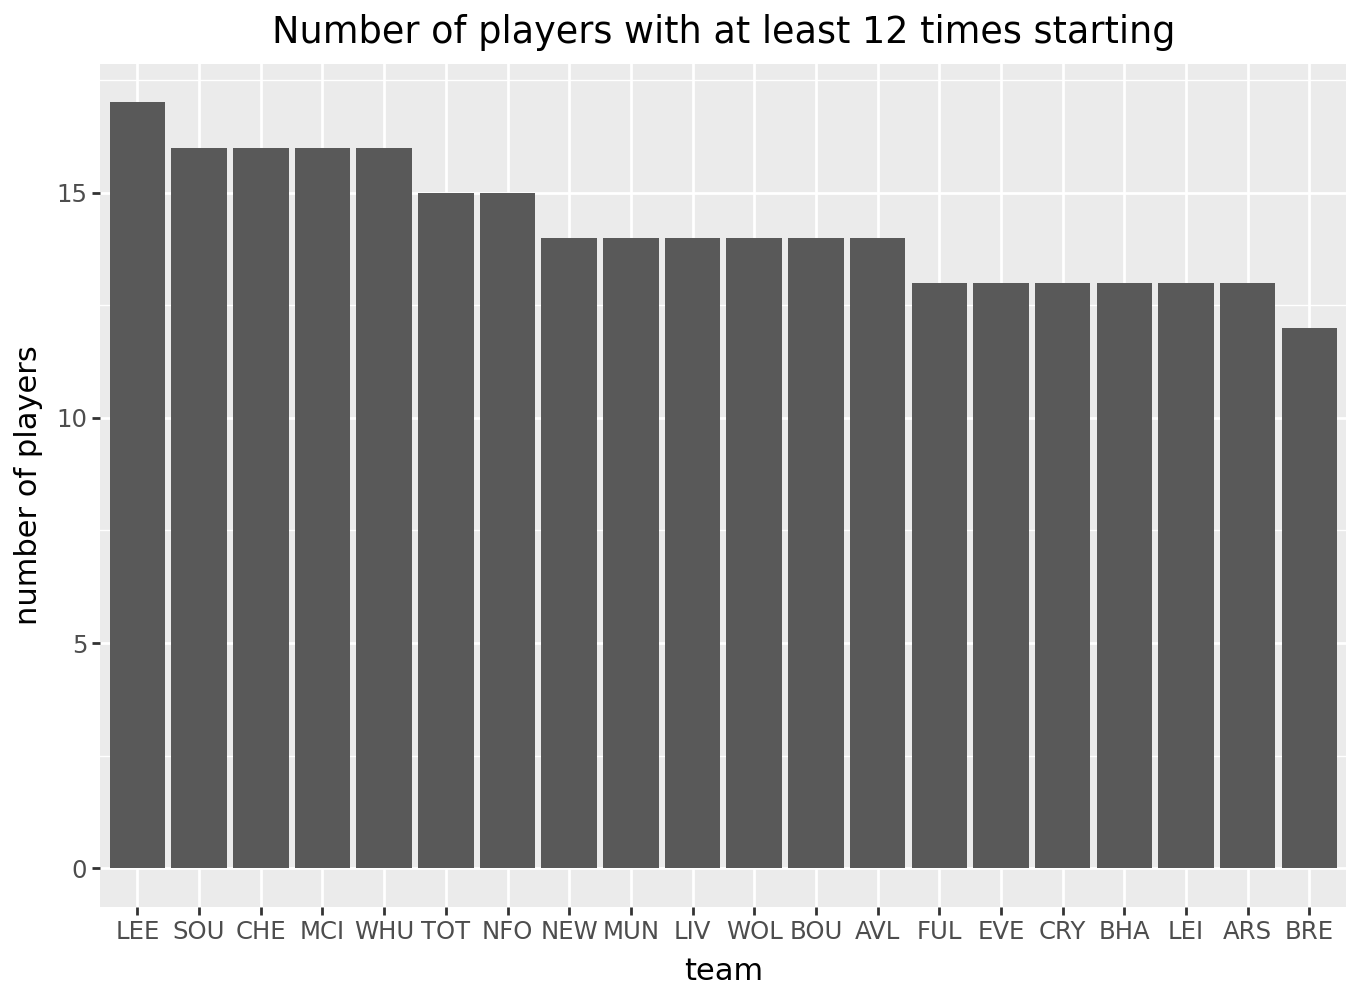

In [3]:
#plot 1 Number of players with at least 12 times starting
np_df = df.pivot_table('total_points',index='team', aggfunc='count').reset_index().rename_axis()
p1 = ggplot(np_df,aes(x= 'reorder(team,-total_points)' , y='total_points')) + geom_col() + \
     labs(x='team', y='number of players', title='Number of players with at least 12 times starting') +\
     theme(figure_size=(6.8, 5))
p1.show()

First observation is there were not that much changes in first eleven players across all league. Despite Leeds, Southampton, Chelsea and Manchester City all teams had really steady first eleven. Brentford had the most steady first eleven players. This should affect some decision making in picking players as we want the most steady players in our team.

Now let's view all relevant columns and their statistics such as mean, standard deviation, minimum, maximum and quantiles.

In [4]:
#Viewing relevant columns and their statistics
col = ['total_points','points_per_game','price','goals_scored','assists','ict_index','minutes','bonus','clean_sheets',
       'clean_sheets_per_90','creativity','expected_assists','expected_assists_per_90','expected_goal_involvements',
       'expected_goal_involvements_per_90', 'expected_goals', 'expected_goals_conceded','expected_goals_conceded_per_90',
       'expected_goals_per_90', 'goals_conceded', 'goals_conceded_per_90', 'influence','own_goals', 'penalties_missed',
       'penalties_order', 'penalties_saved', 'red_cards', 'saves', 'saves_per_90', 'selected_rank','starts',
       'starts_per_90','threat', 'value_form', 'value_season', 'yellow_cards','goal_involvements']
pd.set_option('display.expand_frame_repr', False)
print(df[col].describe().transpose())

                                   count         mean         std     min      25%      50%      75%      max
total_points                       285.0    91.982456   42.380940   25.00    60.00    85.00   118.00   272.00
points_per_game                    285.0     3.063509    1.018250    1.40     2.30     2.90     3.70     7.80
price                              285.0     5.326667    1.404466    3.80     4.50     4.90     5.60    13.10
goals_scored                       285.0     3.080702    4.576095    0.00     0.00     1.00     4.00    36.00
assists                            285.0     2.754386    3.140382    0.00     0.00     2.00     4.00    18.00
ict_index                          285.0   111.535789   66.547511   24.90    65.50    91.60   144.10   371.00
minutes                            285.0  2201.582456  670.404995  863.00  1620.00  2135.00  2766.00  3420.00
bonus                              285.0     7.610526    7.015016    0.00     3.00     6.00    11.00    48.00
clean_shee

This table of statistics that very clear view the data. Value season column is total points divided by price. We see that columns like total_points, value_season and influence are comparisionable across the all data and is distributed more or less evenly. But there are columns, for example column saves, which is only valuable for goalkeepers and clearly we see that most of a players haven't got any saves. Which is important to separate players position in analysis of specific columns.

On the next plot we will see all of correlation between relevant statistics and we can deduct how strong they correlate. Primarly we should focus specifically on the total_points correlate column, as an this whole analysis is based on this. Let's see correlation plot.

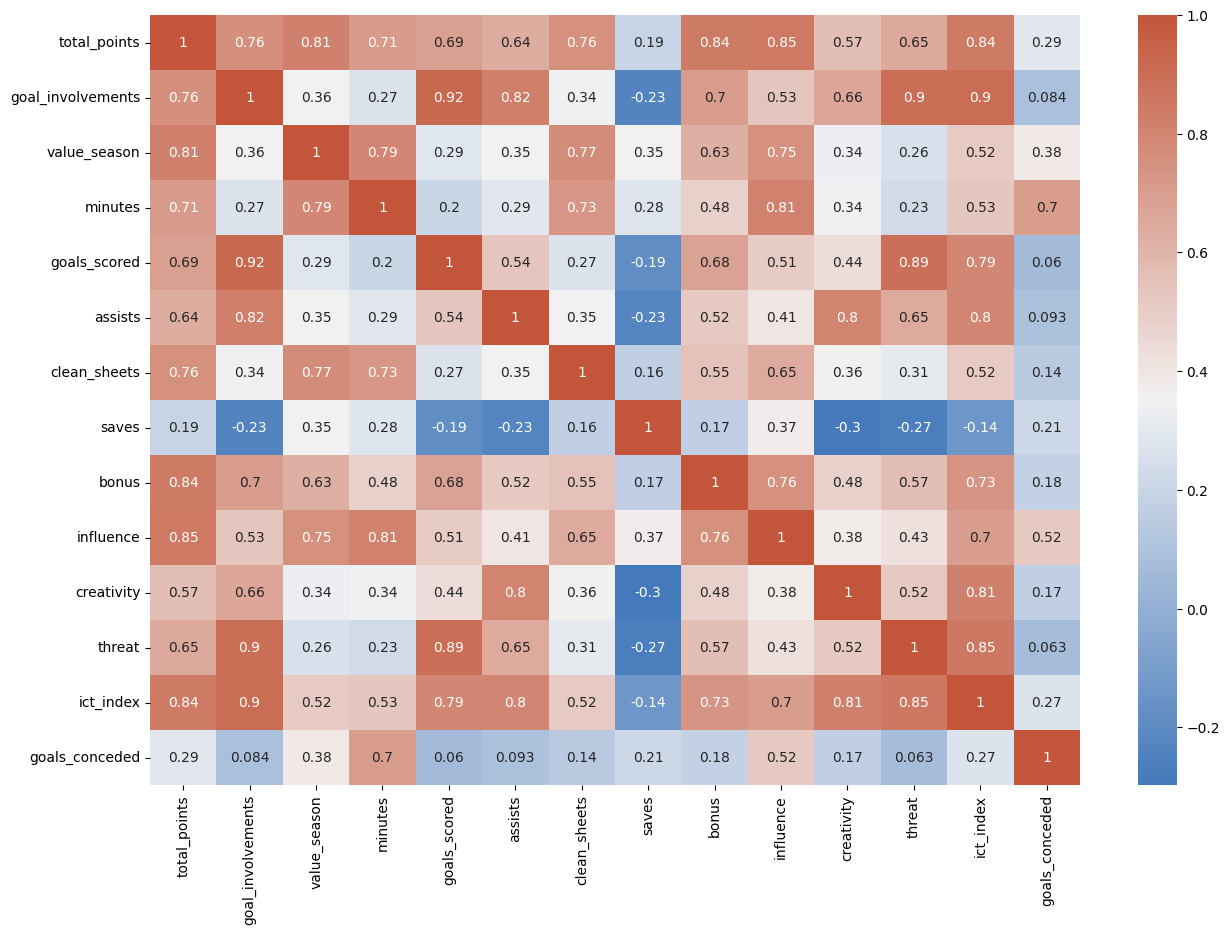

In [5]:
#plot 2 Correlation between different variables
corr_df = df[['total_points','goal_involvements', 'value_season','minutes', 'goals_scored', 'assists', 'clean_sheets',
      'saves', 'bonus', 'influence', 'creativity','threat', 'ict_index', 'goals_conceded']].corr()

f, ax = plt.subplots(figsize=(15,10))
cmap = sns.diverging_palette(250,20, as_cmap=True) #Configure custom diverging colormap
sns.heatmap(corr_df, annot=True, cmap=cmap)
plt.show()

We see that for total points correlate columns are **(80-85%)**:  influence, bonus, ict_index, value_season. Next we have **76%** correlate cleansheets and goal_involvements, then **(64%-71%)** minutes, goals_scored, threat, assists. Creativity column only has **57%** correlate. Naturally bonus and value_season should have this big number because they are strictly bond to points. Ict_index and influence is suprisingly very high, higher than cleansheets and goal_involvements which are naturally converted to points.

In this analysis firstly we will take up value_season, goal_involvements and cleensheets. We will analysis this column firstly by teams followed by positon and then by position and teams. On the second part we will detucted data base on **influence, creativity, threat**, combining all three previous - **ict_index** and **bonus**.

## Analysis by team

Let's compare some data in charts. Important plots for showing very relevant statistics distributed by teams. Firstly we will see the combined data by teams from all of positions and then we will analyze individual statistics by position.

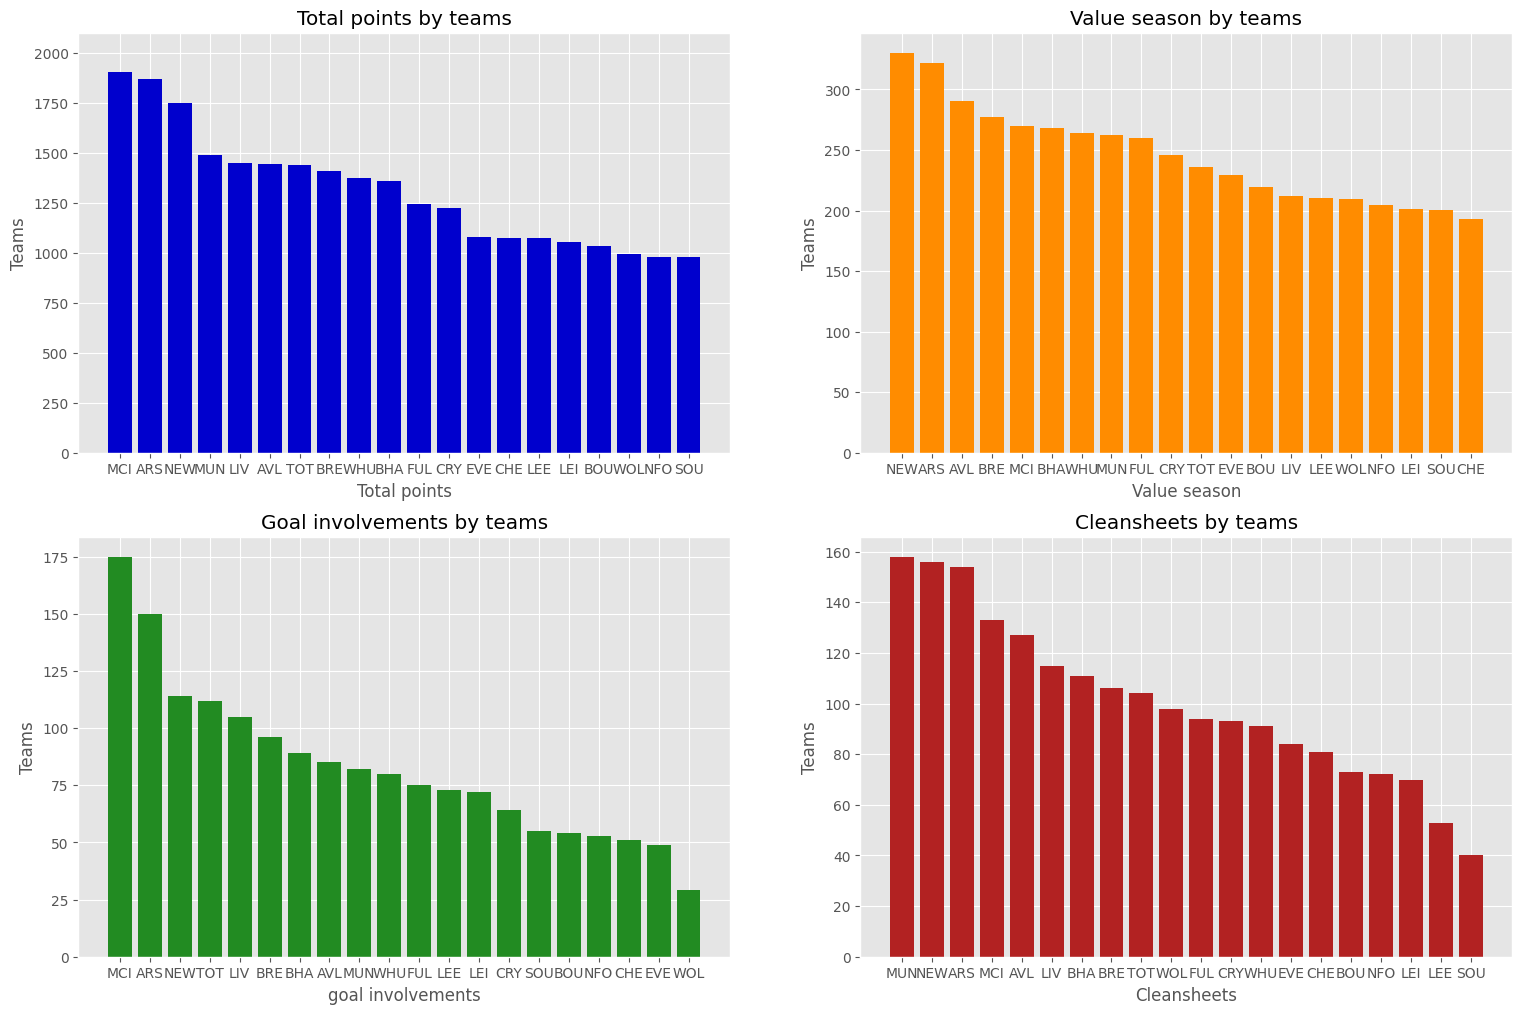

In [6]:
#plot 3 total points, value season, goal involvements, clean sheets by teams
plt.style.use('ggplot')
tp_df=df.pivot_table('total_points', index='team', aggfunc='sum').sort_values(by='total_points',ascending=False)
vs_df=df.pivot_table('value_season', index='team', aggfunc='sum').sort_values(by='value_season',ascending=False)
gi_df=df.pivot_table('goal_involvements', index='team', aggfunc='sum').sort_values(by='goal_involvements',ascending=False)
cs_df=df.pivot_table('clean_sheets', index='team', aggfunc='sum').sort_values(by='clean_sheets',ascending=False)

fg, ax = plt.subplots(2, 2, figsize=(18.5,12))
(ax1, ax2), (ax3, ax4) = ax

#Plot 3_1
x1 = tp_df.index
y1 = tp_df['total_points']
ax1.bar(x1, y1,color='#0000CD')
ax1.set(title='Total points by teams', ylabel='Teams', xlabel='Total points')
ax1.axis(ymin=0,ymax=2100)

#Plot 3_2
x2 = vs_df.index
y2 = vs_df['value_season']
ax2.bar(x2, y2, color='#FF8C00')
ax2.set(title='Value season by teams', ylabel='Teams', xlabel='Value season')

#Plot 3_3
x3 = gi_df.index
y3 = gi_df['goal_involvements']
ax3.bar(x3, y3, color = '#228B22')
ax3.set(title='Goal involvements by teams', ylabel='Teams', xlabel='goal involvements')

#Plot 3_4
x4 = cs_df.index
y4 = cs_df['clean_sheets']
ax4.bar(x4, y4, color = '#B22222')
ax4.set(title='Cleansheets by teams', ylabel='Teams', xlabel='Cleansheets')

#plt.tight_layout()
plt.show()

Conclusions from this 4 plots. From 1st conclusions are simple we want as many players from Manchester City, Arsenal and Newcastle and from teams like Everton, Leeds, Chelsea, Leicester, Bournemouth,Wolverhampton,Nottingham Forrest, Southampton we don't pick as many players. 

Second plot shows value season which is column created by divided total_points by price. We can see that Newcastle and Arsenal player's are the best in terms of value season. Aston Villa and Brentford are slightly worse but still great option. From top teams we see that Liverpool players are pricy in comparision to their points. 

The 3rd graph shows goal involvements by team. This statistic reflects of sum of assists and goals. This measures the attack returns from players by team. Most contributed to this score were midfielders. But forwards and attacking defenders are also involved in this statistic. Manchester City and Arsenal are the most offence teams in the league.

When we take cleensheets into analysis we can tell that players from Manchester United and Newcastle United are the best. Taking from that Newcastle United are relatively cheap cost we see that this is the best option. Then close enough are Arsenal and Manchester City.

Now let's see how points were distributed by all players and also by positions. This will give us general point of view to difference between positions.

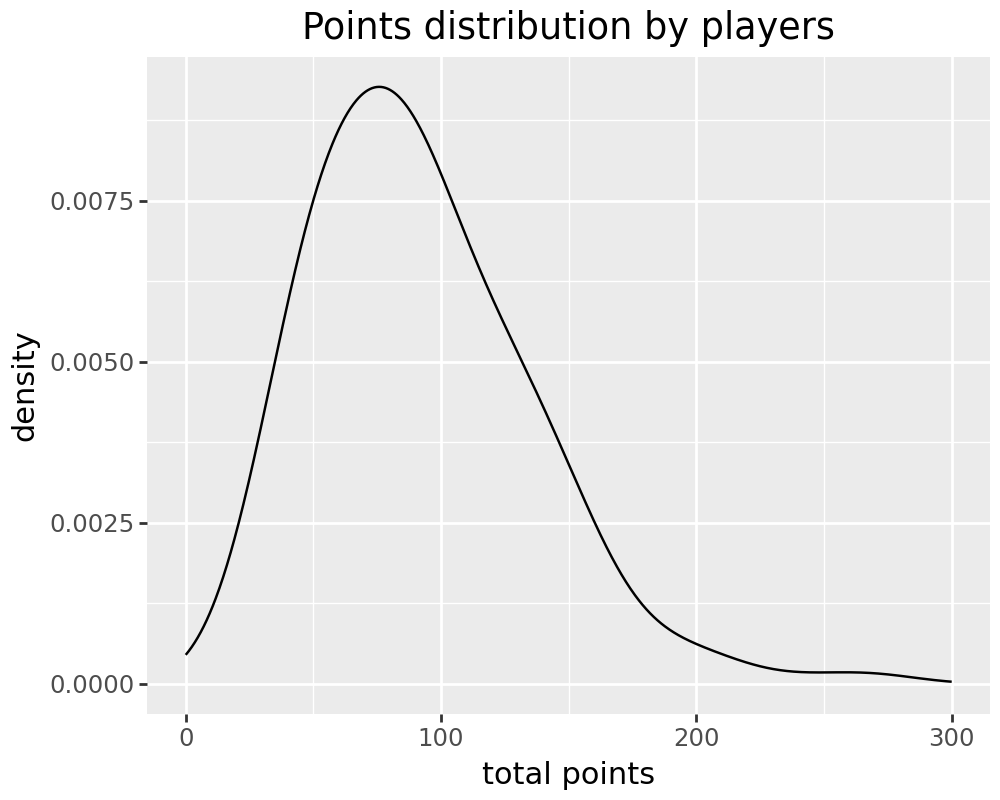

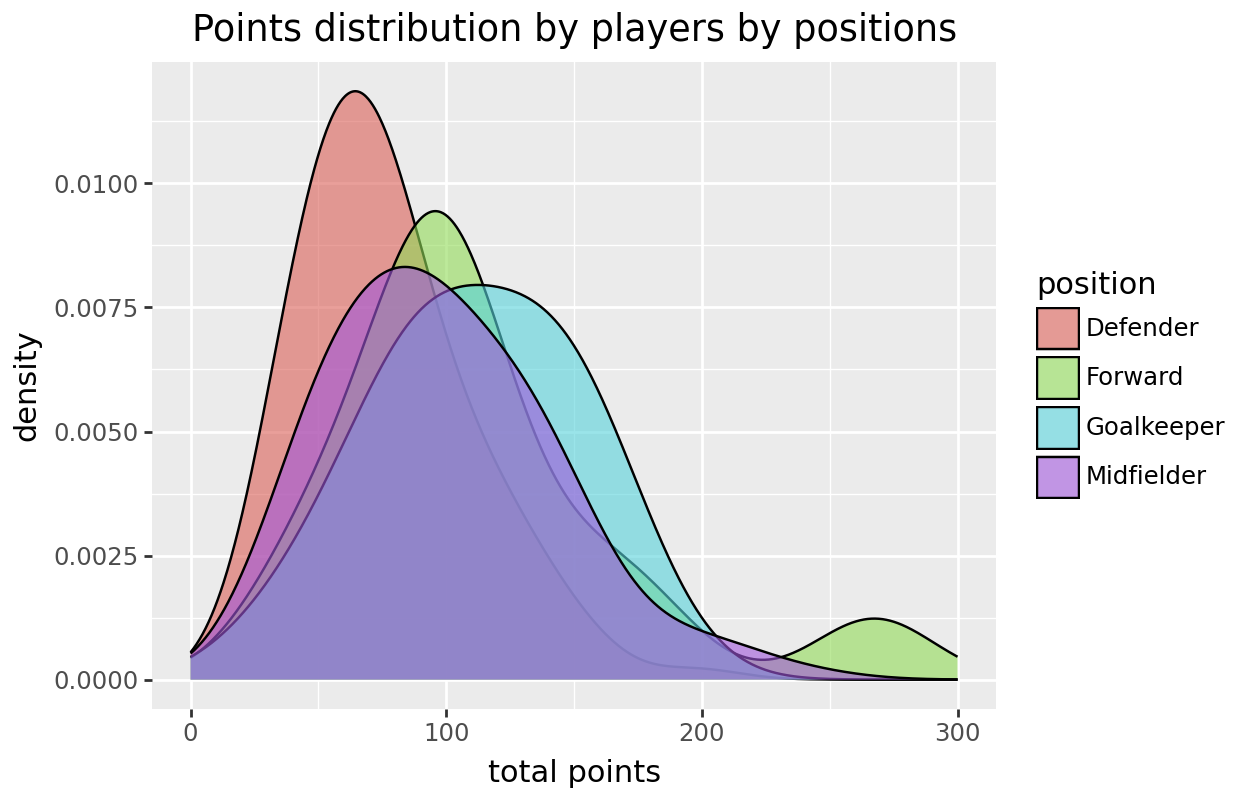

In [7]:
#plot 4 points of distribution
p4 = ggplot(df,aes(x= 'total_points')) + geom_density(adjust = 1.5, alpha = 0.6) + xlim(0,300) +\
      labs(x='total points', y='density', title='Points distribution by players') + theme(figure_size=(5, 4))
p4.show()

#plot 5 points of distribution by positions
p5 = ggplot(df,aes(x= 'total_points', group = 'position', fill='position')) + xlim(0,300) +\
     geom_density(adjust = 1.5, alpha = 0.6) +\
     labs(x='total points', y='density', title='Points distribution by players by positions') +\
     theme(figure_size=(6.2, 4))
p5.show()

We see that all of the players distribution graph is positively skewed with outliers on the right side. On the other graph we see the diffrence in distribution of each positions. Most resembling normal distribution were goalkeeper distribution. Then there were defenders that are also similiar to normal distribution but in these case with much smaller variance. Defenders and Goalkeepers distribution were almost symmetric.

But Midfielders and Forwards distribution were positively skewed, because of the outliers on the right side. In the following analysis we will use for defenders and goalkeepers mean as average statistic. For the skewed distribution we should use median as an average to not distort result by outliers. With this in mind we will use median for all of the statistics and positions in next plot.

## Analysis by position

More depth of analysis will be provided when splitting relevant statistics by position. Now let's see general plot that will the diffrence between each positions. 

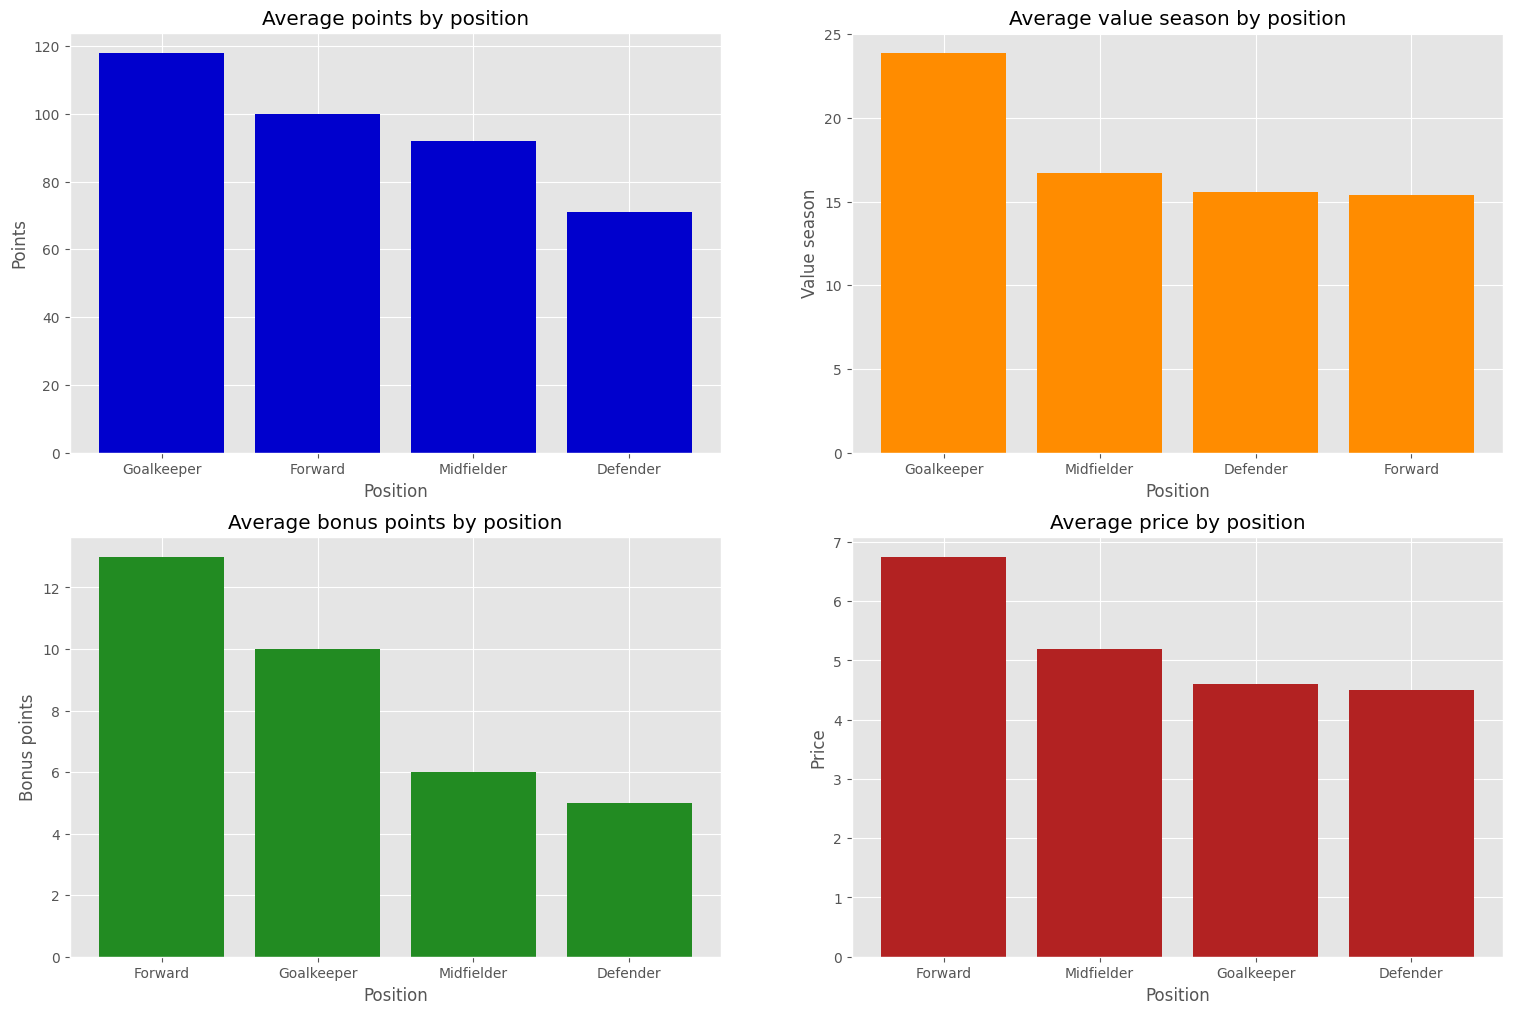

In [8]:
#plot 6 Average points, value season, bonus, price by position
tp_df = df.pivot_table('total_points', index='position', aggfunc='median').sort_values(by='total_points', ascending=False)
vs_df = df.pivot_table('value_season', index='position', aggfunc='median').sort_values(by='value_season', ascending=False)
b_df = df.pivot_table('bonus', index='position', aggfunc='median').sort_values(by='bonus', ascending=False)
pr_df = df.pivot_table('price', index='position', aggfunc='median').sort_values(by='price', ascending=False)

fg, ax = plt.subplots(2, 2, figsize=(18.5,12))
(ax1, ax2), (ax3, ax4) = ax

#Plot 6_1
x1 = tp_df.index
y1 = tp_df['total_points']
ax1.bar(x1, y1, color='#0000CD')
ax1.set(title='Average points by position', xlabel='Position', ylabel='Points')

#Plot 6_2
x2 = vs_df.index
y2 = vs_df['value_season']
ax2.bar(x2, y2, color='#FF8C00')
ax2.set(title='Average value season by position', xlabel='Position', ylabel='Value season')

#Plot 6_3
x3 = b_df.index
y3 = b_df['bonus']
ax3.bar(x3, y3, color='#228B22')
ax3.set(title='Average bonus points by position', xlabel='Position', ylabel='Bonus points')

#Plot 6_4
x4 = pr_df.index
y4 = pr_df['price']
ax4.bar(x4, y4, color='#B22222')
ax4.set(title='Average price by position', xlabel='Position', ylabel='Price')

plt.show()

At a glance we can see that goalkeeper position is very cheap but have the most points on average. This means that goalkeeper position is very steady.

More depth of analysis will be provided when divide data by team and also by positions. We will combine those two categories and make conclusions in this breakdown. Let's see plot of team points by position. 

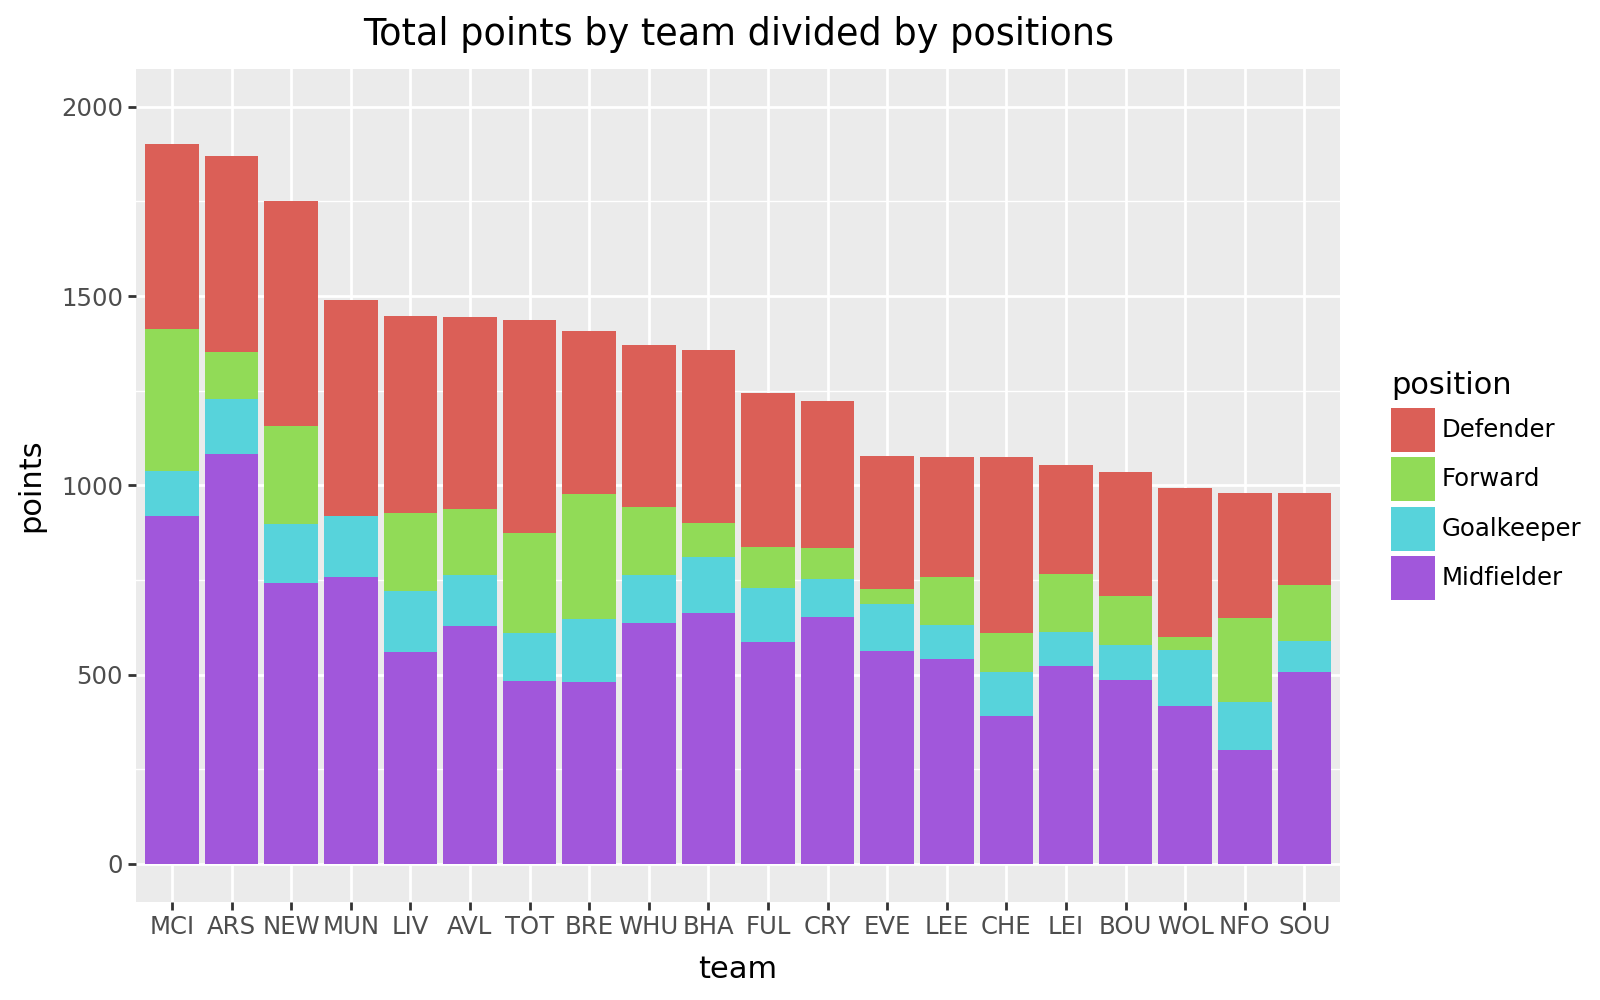

In [9]:
#plot 7 Total points by team divided by positions
team_order = ['MCI','ARS','NEW','MUN','LIV','AVL','TOT','BRE','WHU','BHA','FUL','CRY','EVE','LEE','CHE','LEI','BOU','WOL',
              'NFO','SOU']
tp_p_df = df.pivot_table('total_points', index=['team','position'], aggfunc='sum').reset_index().rename_axis()
p7 = ggplot(tp_p_df) + aes(x = 'team' , y = 'total_points',  fill = 'position') + geom_col() +\
     labs(x='team', y='points', title='Total points by team divided by positions') + ylim(0,2000) +\
     scale_x_discrete(limits = team_order) + theme(figure_size=(8, 5))
p7.show()

In this graph we can observe more things to our analysis. We see that maybe overall team not perform well but midfielders from Southampton can be very budget friendly and not bad option. The same goes for midfielders from Crystal Palace, Brighton and West Ham United. Top option are players from Arsenal and Manchester City. In defender block cool budget option will be someone from Wolverhampton or Brighton. But overall best defenders will be from Tottenham, Newcastle United and Manchester United which is not that obvious .  In Forward area it is more about person performing because most teams usually play 1 forward, in some case 2. Two options definitely stand out which is Manchester City and Brentford. Both teams having top scorers Erling Haaland and Ivan Toney. For a goalkeeper an interesting option will be player from Nottingham Forest or Brentford. A little note that in Manchester United there are no points for forward, which means in majorty of games attacking side of a team was build by midfielders.

Let's see that our conclusions about graph is really true and see top 5 team options for each position.

In [10]:
print('Top 5 most points by position: ')
a = tp_p_df[tp_p_df['position'] == 'Midfielder'].sort_values(by=['total_points'],ascending=False).head(5)
b = tp_p_df[tp_p_df['position'] == 'Defender'].sort_values(by=['total_points'],ascending=False).head(5)
c = tp_p_df[tp_p_df['position'] == 'Forward'].sort_values(by=['total_points'],ascending=False).head(5)
d = tp_p_df[tp_p_df['position'] == 'Goalkeeper'].sort_values(by=['total_points'],ascending=False).head(5)

side_by_side(a,b,c,d)

Top 5 most points by position: 


,team,position,total_points
3,ARS,Midfielder,1084.0
51,MCI,Midfielder,918.0
54,MUN,Midfielder,758.0
58,NEW,Midfielder,742.0
11,BHA,Midfielder,663.0
,team,position,total_points
55,NEW,Defender,595.0
52,MUN,Defender,570.0
67,TOT,Defender,563.0
44,LIV,Defender,521.0


Everything concludes seems right. 
Now let's see another statistic by team by positions. And this statistic will be season_value which is total_points divided by price. This graph will be key for analysis of undervalued formations of teams. 

Now let's deeply analyse value season by team grouping the different roles of players.

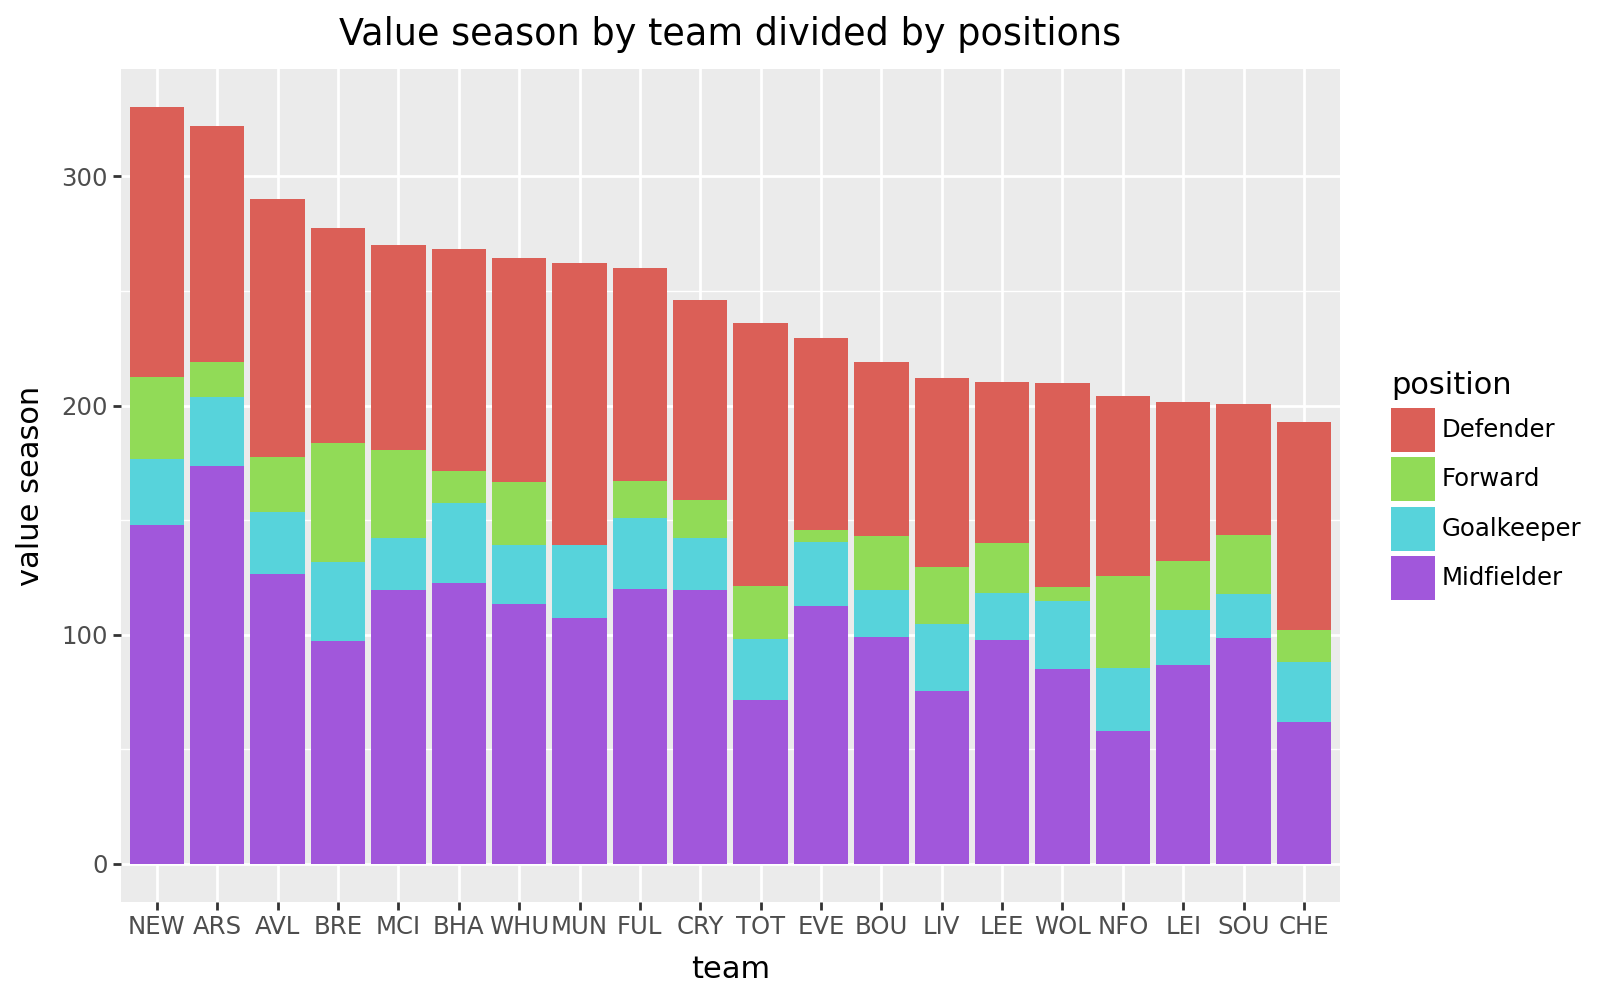

In [11]:
#plot 8 value season by positions
team_order = ['NEW','ARS','AVL','BRE','MCI','BHA','WHU','MUN','FUL','CRY','TOT','EVE','BOU','LIV','LEE','WOL','NFO','LEI',
              'SOU','CHE']
vs_p_df = df.pivot_table('value_season', index=['team','position'], aggfunc='sum').reset_index().rename_axis()
p8 = ggplot(vs_p_df) + aes(x = 'team' , y = 'value_season',  fill = 'position') + geom_col() +\
     labs(x='team', y='value season', title='Value season by team divided by positions')  +\
     scale_x_discrete(limits = team_order) + theme(figure_size=(8, 5))
p8.show()

So we see that there are some great options in defence which are defenders and goalkeepers that have a lot season value. We are talking about Manchester United, Newcastle, Tottenham and Aston Villa. For midfielders arsenal stands out, but Newcastle, Aston Villa, Brighton, Fullham are also great. For Forwards Brentford stands out but Nottingham Forest, Manchester City and Newcastle also great option. Note that Nottingham Forest is penultimate in terms of total points. But forwards in terms of season value are great, when we need cheap option, maybe for our 3rd spot there will be room for a player in team. 

Let's see top 5 teams in each positions.

In [12]:
#top 5 teams lead in value season by position
print('Top 5 most points by position: ')
a = vs_p_df[vs_p_df['position'] == 'Midfielder'].sort_values(by=['value_season'],ascending=False).head(5)
b = vs_p_df[vs_p_df['position'] == 'Defender'].sort_values(by=['value_season'],ascending=False).head(5)
c = vs_p_df[vs_p_df['position'] == 'Forward'].sort_values(by=['value_season'],ascending=False).head(5)
d = vs_p_df[vs_p_df['position'] == 'Goalkeeper'].sort_values(by=['value_season'],ascending=False).head(5)

side_by_side(a,b,c,d)

Top 5 most points by position: 


,team,position,value_season
3,ARS,Midfielder,173.8
58,NEW,Midfielder,147.7
7,AVL,Midfielder,126.7
11,BHA,Midfielder,122.7
35,FUL,Midfielder,120.1
,team,position,value_season
52,MUN,Defender,123.3
55,NEW,Defender,117.7
67,TOT,Defender,114.8
4,AVL,Defender,112.4


How this would look with breakdown by position.

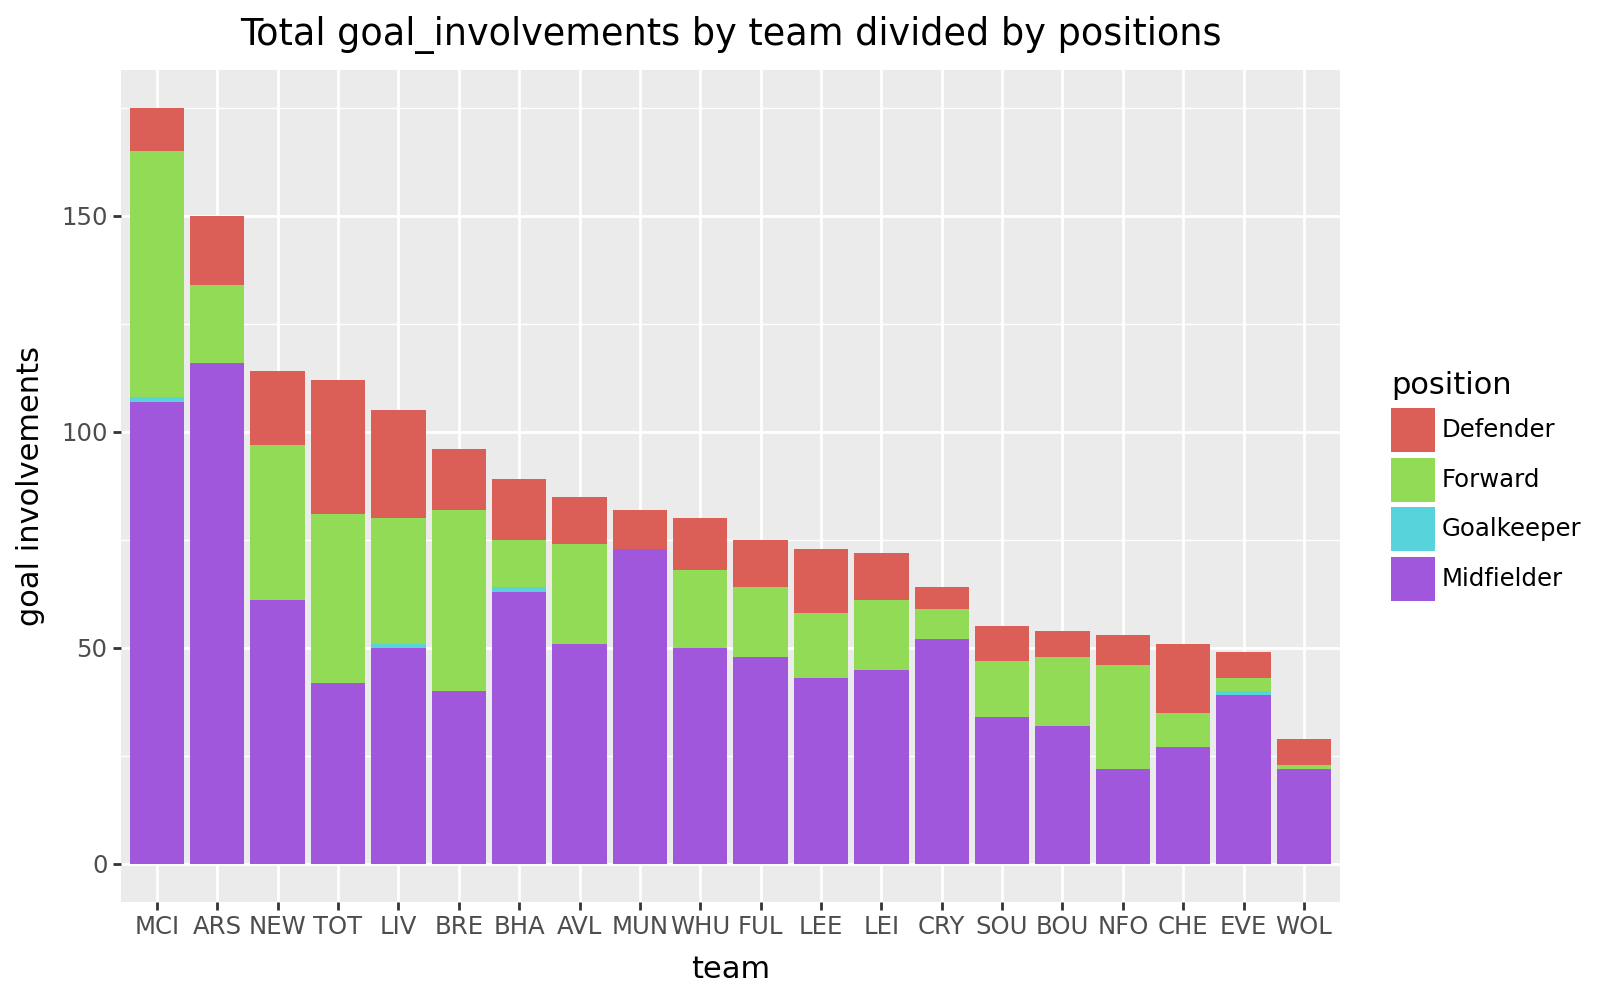

In [13]:
# plot 9 a goal involvement by team by position
team_order = ['MCI','ARS','NEW','TOT','LIV','BRE','BHA','AVL','MUN','WHU','FUL','LEE','LEI','CRY','SOU','BOU',
              'NFO','CHE','EVE','WOL']
tp_gi_df = df.pivot_table('goal_involvements', index=['team','position'], aggfunc='sum').reset_index().rename_axis()
tp_gi_df.sort_values(by='goal_involvements', ascending=False)
p9 = ggplot(tp_gi_df) + aes(x = 'team' , y = 'goal_involvements',  fill = 'position') + geom_col() +\
     labs(x='team', y='goal involvements', title='Total goal_involvements by team divided by positions') +\
     scale_x_discrete(limits = team_order) +\
     theme(figure_size=(8, 5))
p9.show()

Naturally position of goalkeeper are not relevant in this statistic which results in only like 3 goal involvements, probably a long assist. Manchester City and arsenal are dominating goal involvements score as midfielders slightly behind them is Manchester United. We see that Totthenham and Liverpool defenders are the most offensive among all teams. Behind them there were Chelsea, Newcastle and Chelsea.

Now Let's take two most critical statistics which are goal involvements and cleansheets. Goal ivolvements are crucial for midfielders, forwards and defenders. On the other hand cleansheets are crucial for defenders and goalkeepers. To summarize analysis so far we will make scatter plots where on x axis will be season value. On y axis will be goal involvement for attackers and cleansheets for defence.

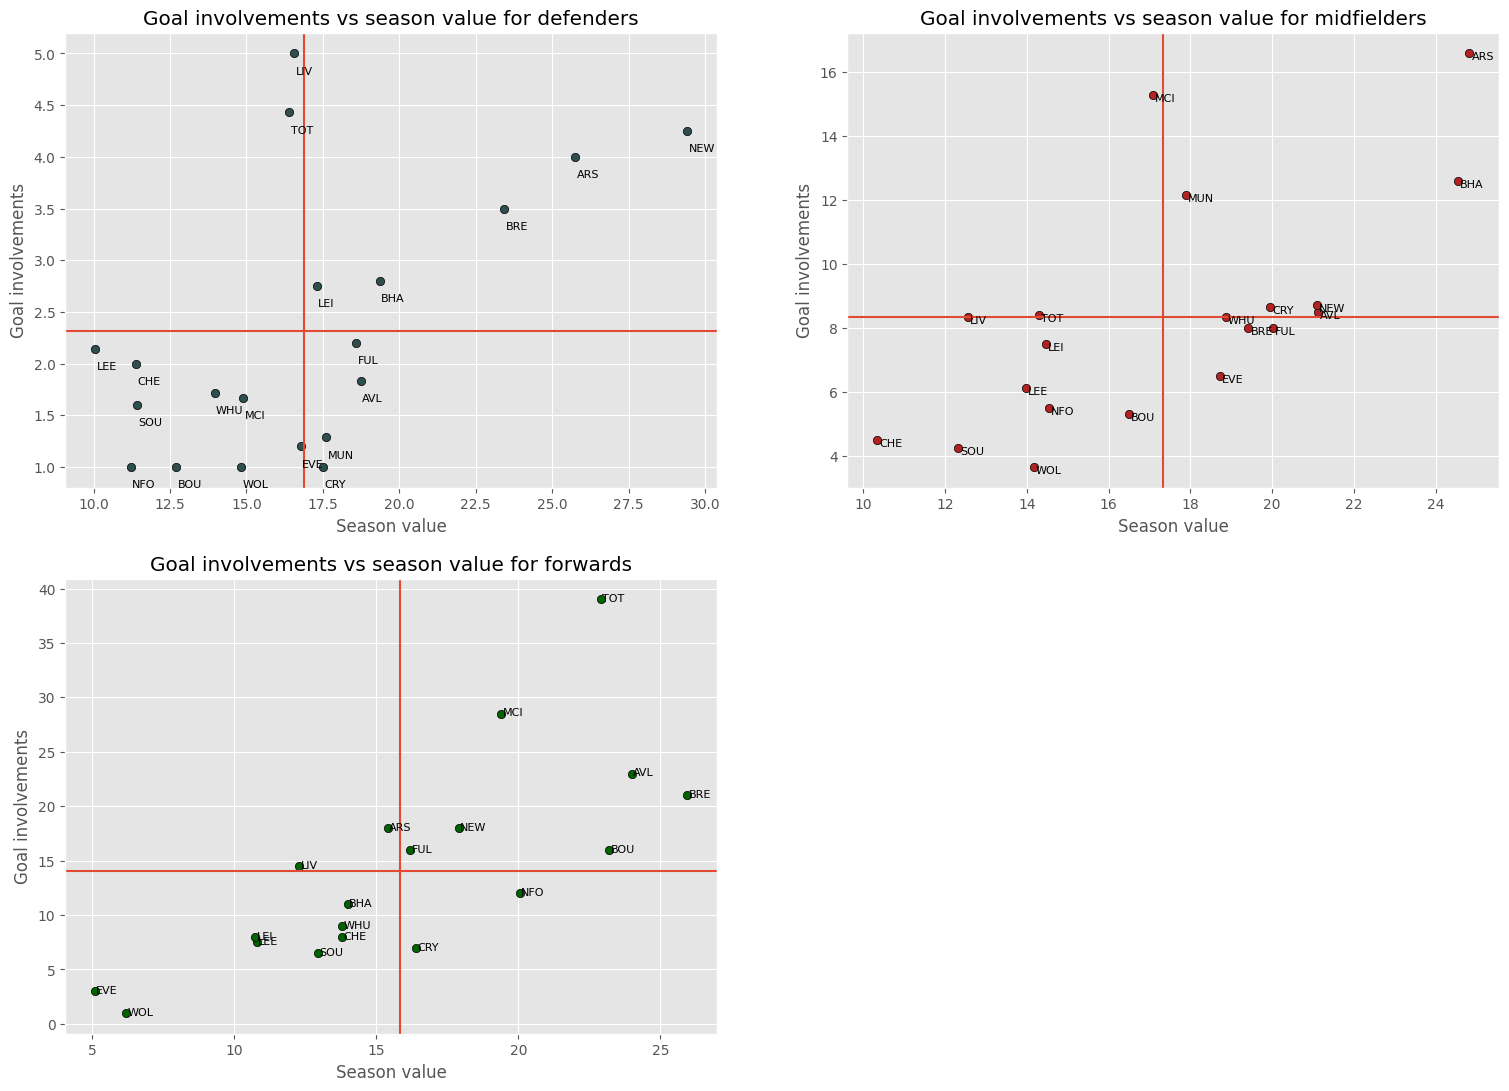

In [14]:
# plot 10 3 plots of goal involvements vs price mid,for,def
df_mid = df[df['position'] == 'Midfielder']
df_def = df[df['position'] == 'Defender']
df_for = df[df['position'] == 'Forward']
df_mid_team = df_mid.groupby(['team']).aggregate({'goal_involvements': 'mean', 'value_season': 'mean'})
df_mid_team.sort_values(by='value_season', ascending=False)
df_def_team = df_def.groupby(['team']).aggregate({'goal_involvements': 'mean', 'value_season': 'mean'})
df_def_team.sort_values(by='value_season', ascending=False)
df_for_team = df_for.groupby(['team']).aggregate({'goal_involvements': 'mean', 'value_season': 'mean'})
df_for_team.sort_values(by='value_season', ascending=False)

fg, ax = plt.subplots(2,2, figsize=(18.5,13))

(ax1, ax2), (ax3, ax4) = ax
ax[-1, -1].axis('off')

#Plot 10_1
x1 = df_def_team['value_season']
y1 = df_def_team['goal_involvements']
ax1.scatter(x1, y1, edgecolor='black', color='#2F4F4F')
ax1.set(title='Goal involvements vs season value for defenders', xlabel='Season value', ylabel='Goal involvements')

for i, txt in enumerate(df_def_team.index):
    ax1.annotate(txt, (x1[i]+.05, y1[i]-.20), fontsize=8)
ax1.axhline(y1.mean())
ax1.axvline(x1.mean())


#Plot 10_2
x2 = df_mid_team['value_season']
y2 = df_mid_team['goal_involvements']
ax2.scatter(x2, y2, edgecolor='black', color='#B22222')
ax2.set(title='Goal involvements vs season value for midfielders', xlabel='Season value', ylabel='Goal involvements')

for i, txt in enumerate(df_mid_team.index):
    ax2.annotate(txt, (x2[i]+.05, y2[i]-.20), fontsize=8)
ax2.axhline(y2.mean())
ax2.axvline(x2.mean())


#Plot 10_3
x3 = df_for_team['value_season']
y3 = df_for_team['goal_involvements']
ax3.scatter(x3, y3, edgecolor='black', color='#006400')
ax3.set(title='Goal involvements vs season value for forwards', xlabel='Season value', ylabel='Goal involvements')

ax3.axhline(y3.mean())
ax3.axvline(x3.mean())

ann_txt3 = df_for_team.index
for i, txt in enumerate(df_for_team.index):
    ax3.annotate(txt, (x3[i]+.05, y3[i]-.20), fontsize=8)

plt.show()

- For defenders: top choice Liverpool, Tottenham , cheaper options are Newcastle, Arsenal, Brentford.
- For midfielders: top choice Arsenal and Brighton in terms for value, but strictly in goal involvements Manchester City and Manchester United. 
- For Forwards: top choice Tottenham, Manchester City , more cheaper options are Aston Villa, Brentford.

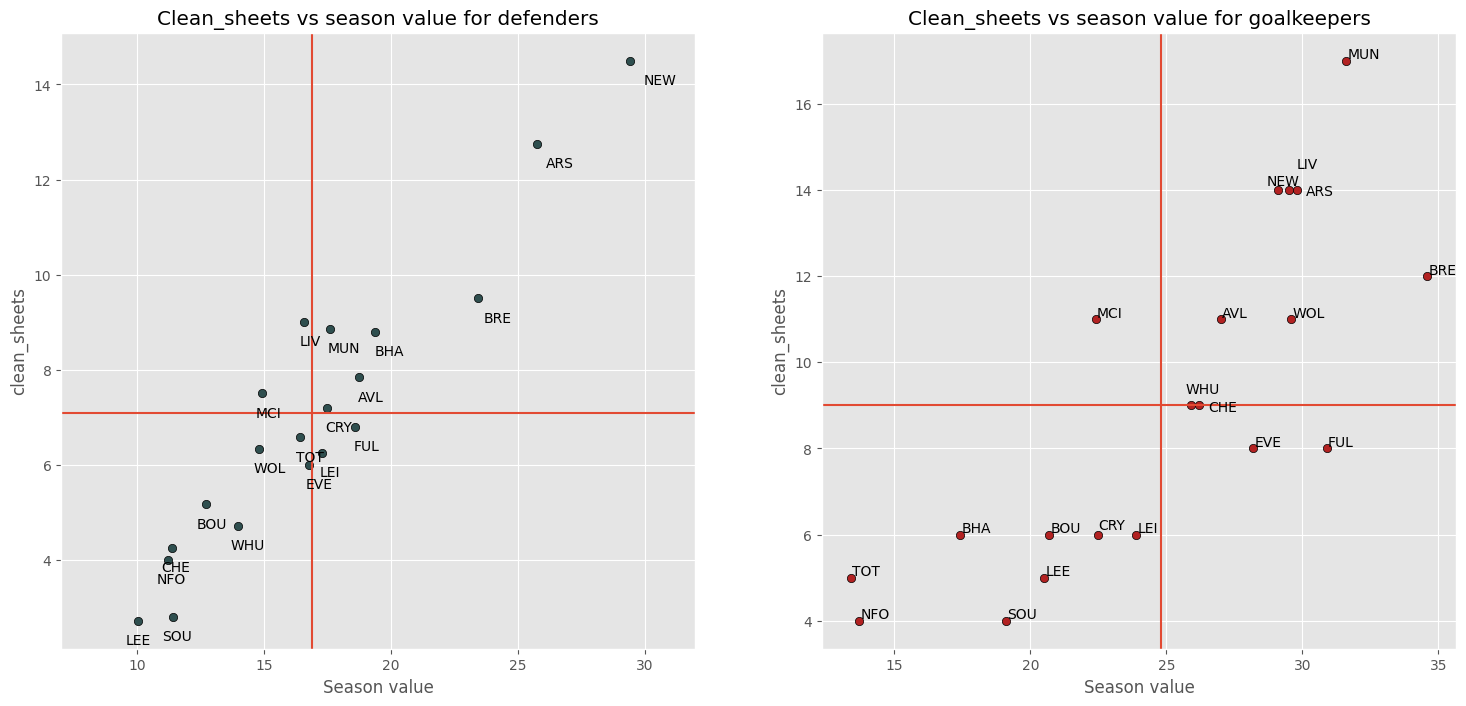

In [15]:
#plot 11 2 plots of clean sheets vs price gk, def
df_gk = df[df['position'] == 'Goalkeeper']
df_def_team = df_def.groupby(['team']).aggregate({'clean_sheets': 'mean', 'value_season': 'mean'})
df_def_team.sort_values(by='value_season', ascending=False)
df_gk_team = df_gk.groupby(['team']).aggregate({'clean_sheets': 'mean', 'value_season': 'mean'})
df_gk_team.sort_values(by='value_season', ascending=False)

fg, ax = plt.subplots(1,2, figsize=(18,8))
(ax1, ax2) = ax

#Plot 11_1
x1 = df_def_team['value_season']
y1 = df_def_team['clean_sheets']
ax1.scatter(x1, y1, edgecolor='black', color='#2F4F4F')
ax1.set(title='Clean_sheets vs season value for defenders', xlabel='Season value', ylabel='clean_sheets')
ax1.axhline(y1.mean())
ax1.axvline(x1.mean())
ax1.set_xlim(7, 32)
for i, txt in enumerate(df_def_team.index):
    ax1.annotate(txt, (x1[i]-1, y1[i]-0.5), fontsize=10, textcoords=('offset points', 'data'))
#texts = [ax1.text(x1[i], y1[i], df_def_team.index[i]) for i in range(len(df_gk_team))] #creating matplotlib.text list
#adjust_text(texts) # use adjust_text from adjust_Text library

#Plot 11_2
x2 = df_gk_team['value_season']
y2 = df_gk_team['clean_sheets']
ax2.scatter(x2, y2, edgecolor='black', color='#B22222')
ax2.set(title='Clean_sheets vs season value for goalkeepers', xlabel='Season value', ylabel='clean_sheets')
ax2.axhline(y2.mean())
ax2.axvline(x2.mean())
texts = [ax2.text(x2[i], y2[i], df_gk_team.index[i]) for i in range(len(df_gk_team))] #creating matplotlib.text list
adjust_text(texts) # use adjust_text from adjust_Text library


plt.show()

We see that for defenders clean sheets are important and the data are segregated in linear order. This is because clean sheets are correlate to season value and in extension to total points. For goalkeepers is not that obvious and straightforward. The data are scattered because for goalkeepers saves is also important criteria. This results that on the graph teams from lower places are moved to the right on x axis. We can assume that those goalkeepers have more saves than goalkeepers from upper table. 
- For defenders: Newcastle and Arsenal are top choices, behind them are Brentford, Brighton,Manchester United and Liverpool .
- For goalkeepers: Manchester United, Liverpool, Newcastle, Arsenal are top choice. Brentford as a cheaper option.

## Analysis by player

Now that we earn some key information about data how position and teams affect statistics we will focus on single player. The statistics we will explore will be influence, creativity, threat, ict index and bonus as at the start of this notebook we conclude that this also correlete with total points. Let's clarify how those are measured:
- **Influence** evaluates a player's impact on matches or the season by considering both decisive actions like goals and assists and significant defensive contributions.
-  **Creativity** assesses a player's ability to produce goalscoring opportunities and likely assists by analyzing the frequency, location, and quality of their passes and crosses.
-   **Threat** examines a player's likelihood of scoring by evaluating their goal attempts, with greater weight given to attempts from more advantageous pitch locations.
-   **ICT Index** -  All three scores above are combined to create an overall ICT Index score.

This columns we will be presenting on plot in comparision to value season. In that case plot will be more informative as a price is also important. Graph with total_points on x axis will be **linear** as all of this criteria above goals and assists and significant defensive contributions. To make it clear first plot will be with total_points. In addition  and reminder this statistics are very correlate with total points. 
We will furhter focus on player and seek to end goal of this analysis which will be diffrent optimal squad selection. 

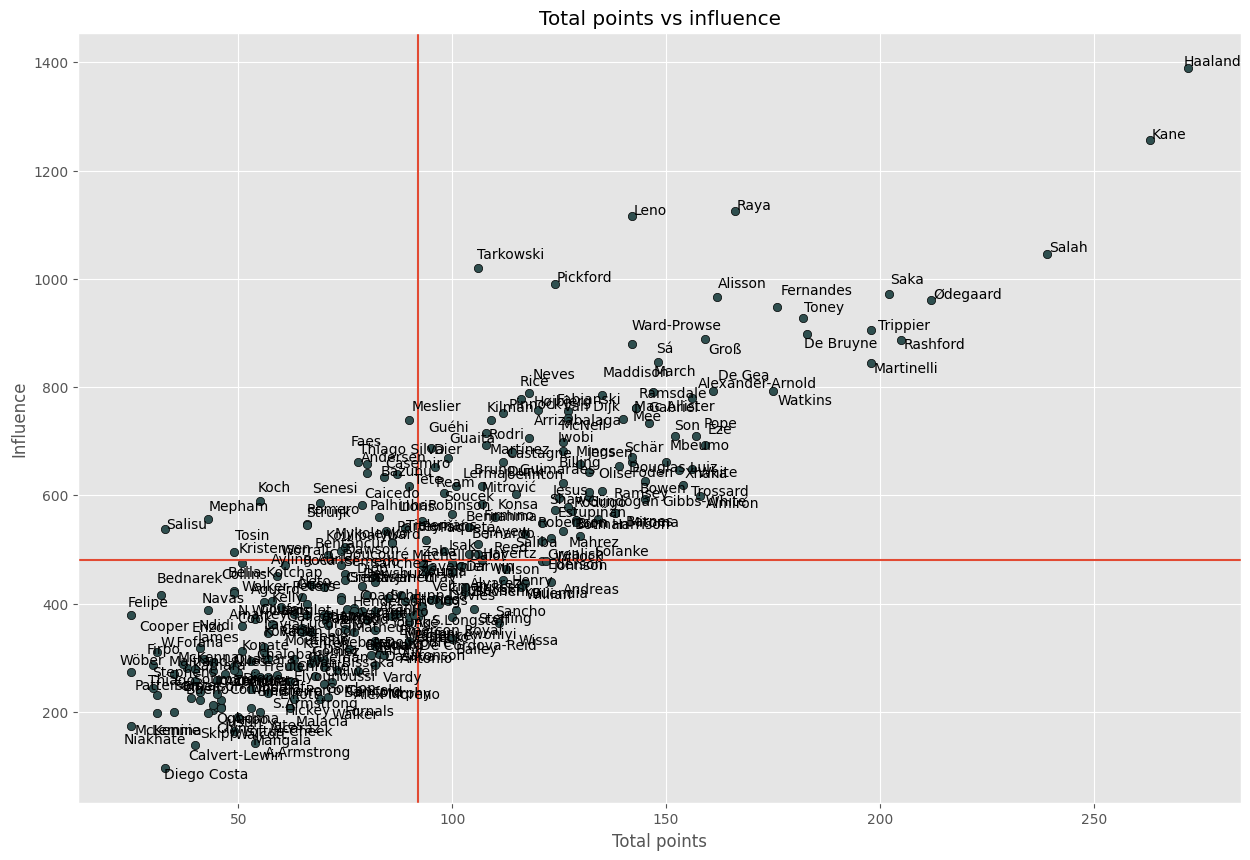

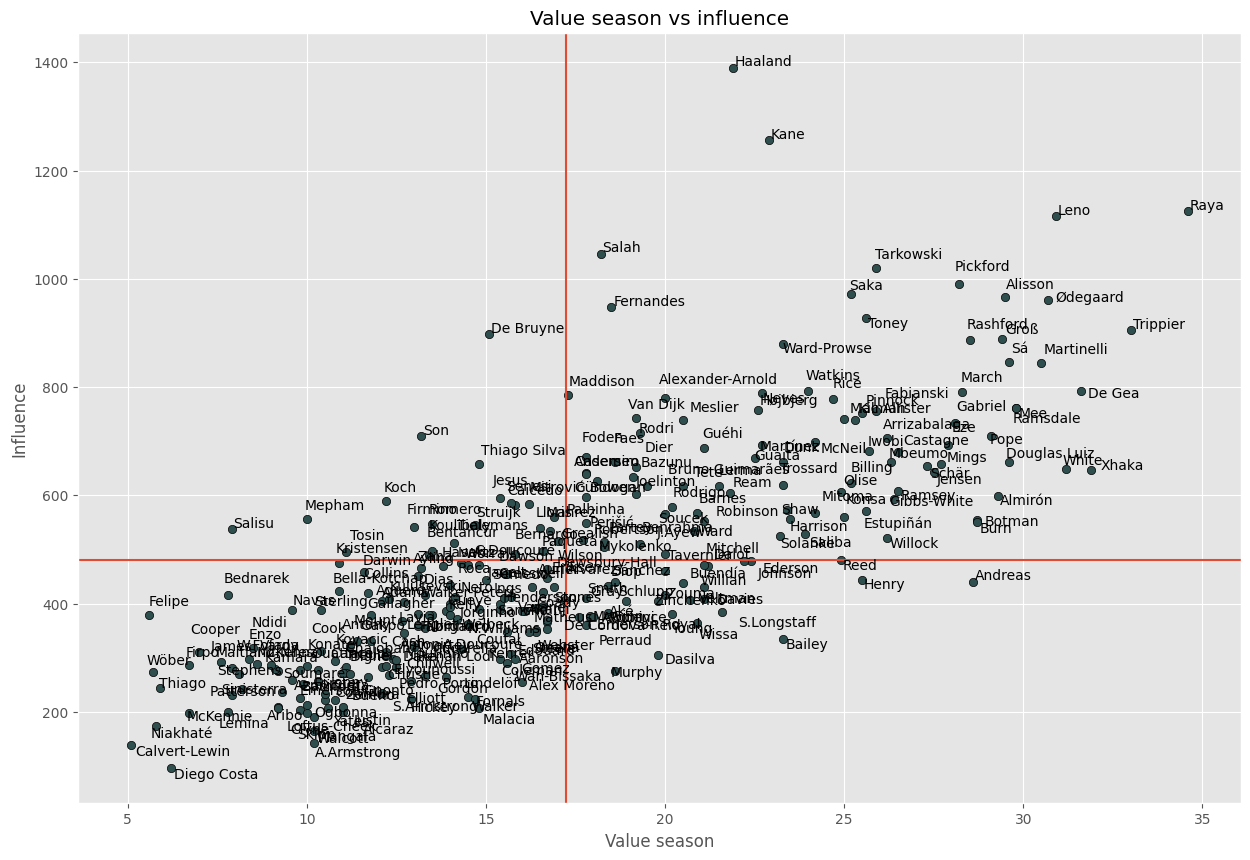

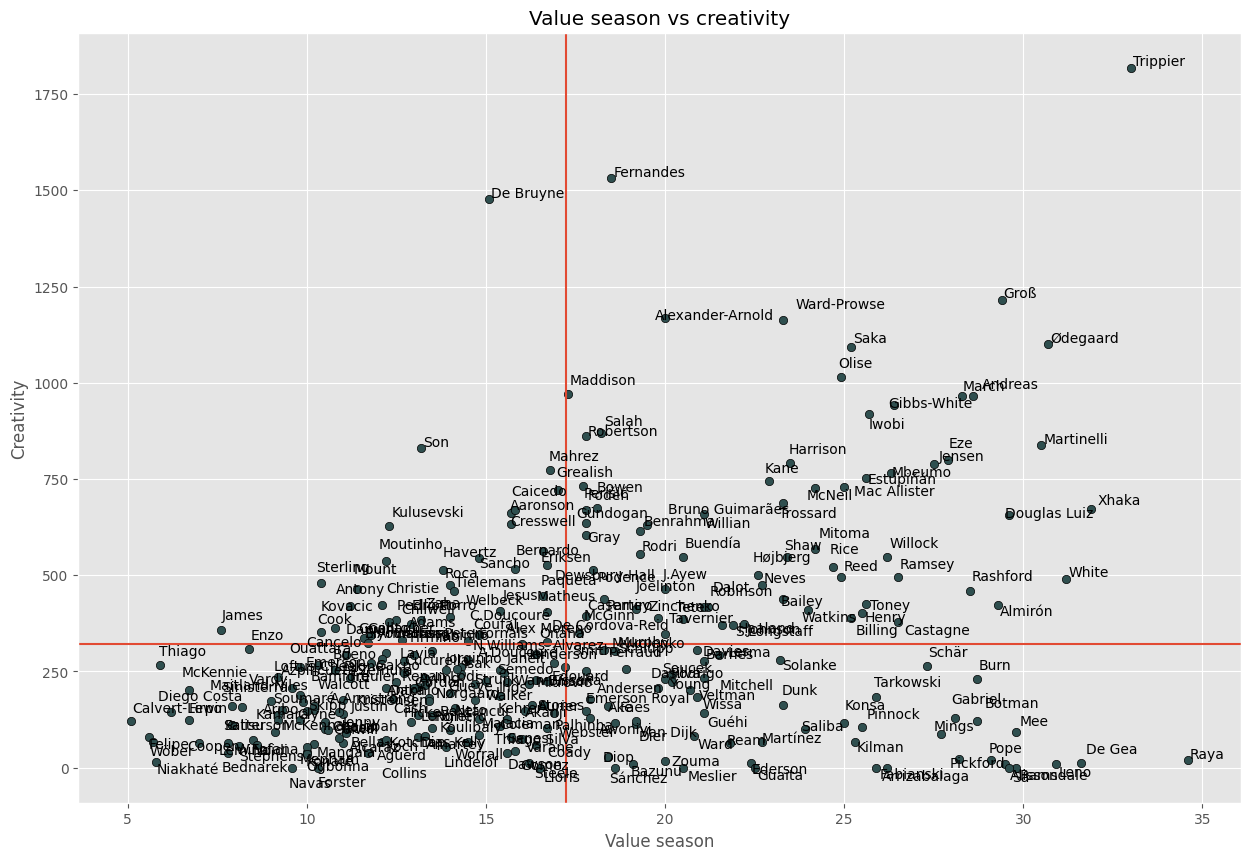

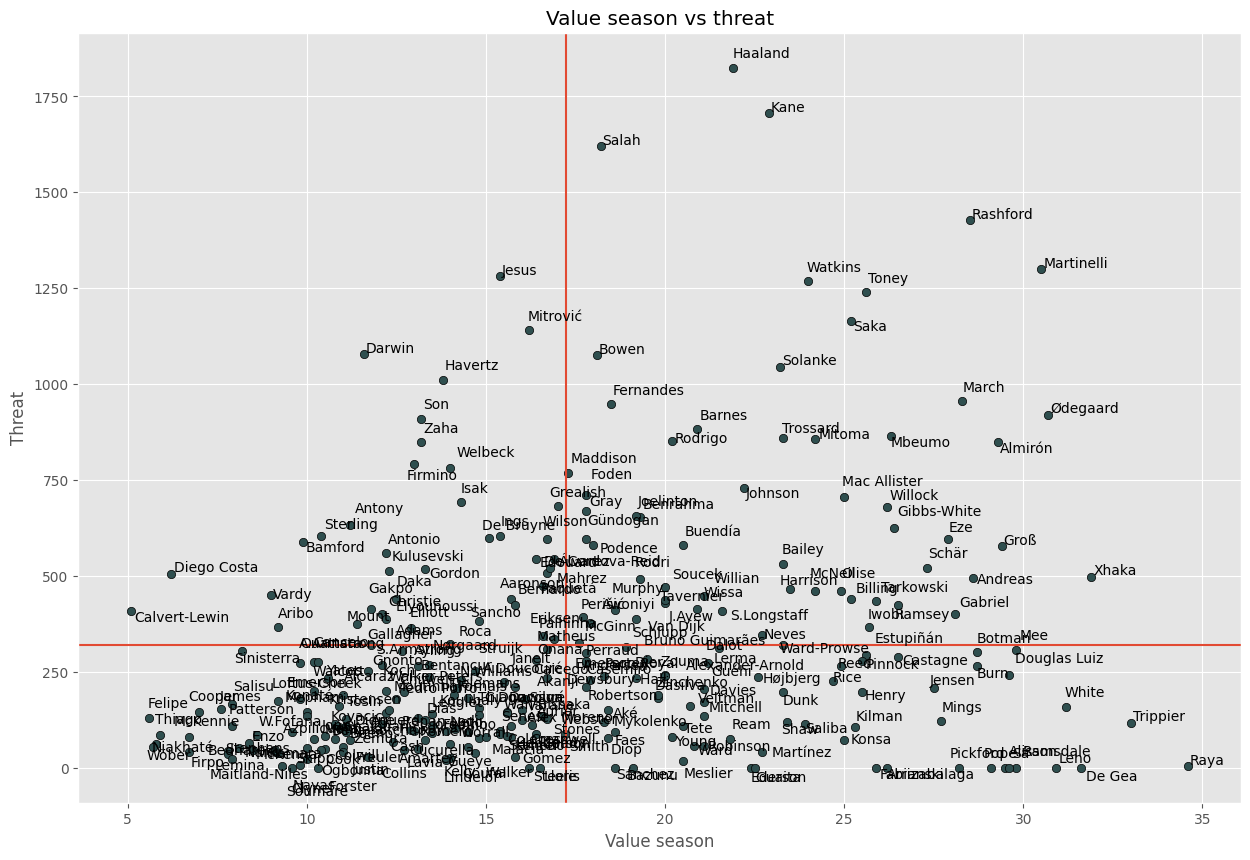

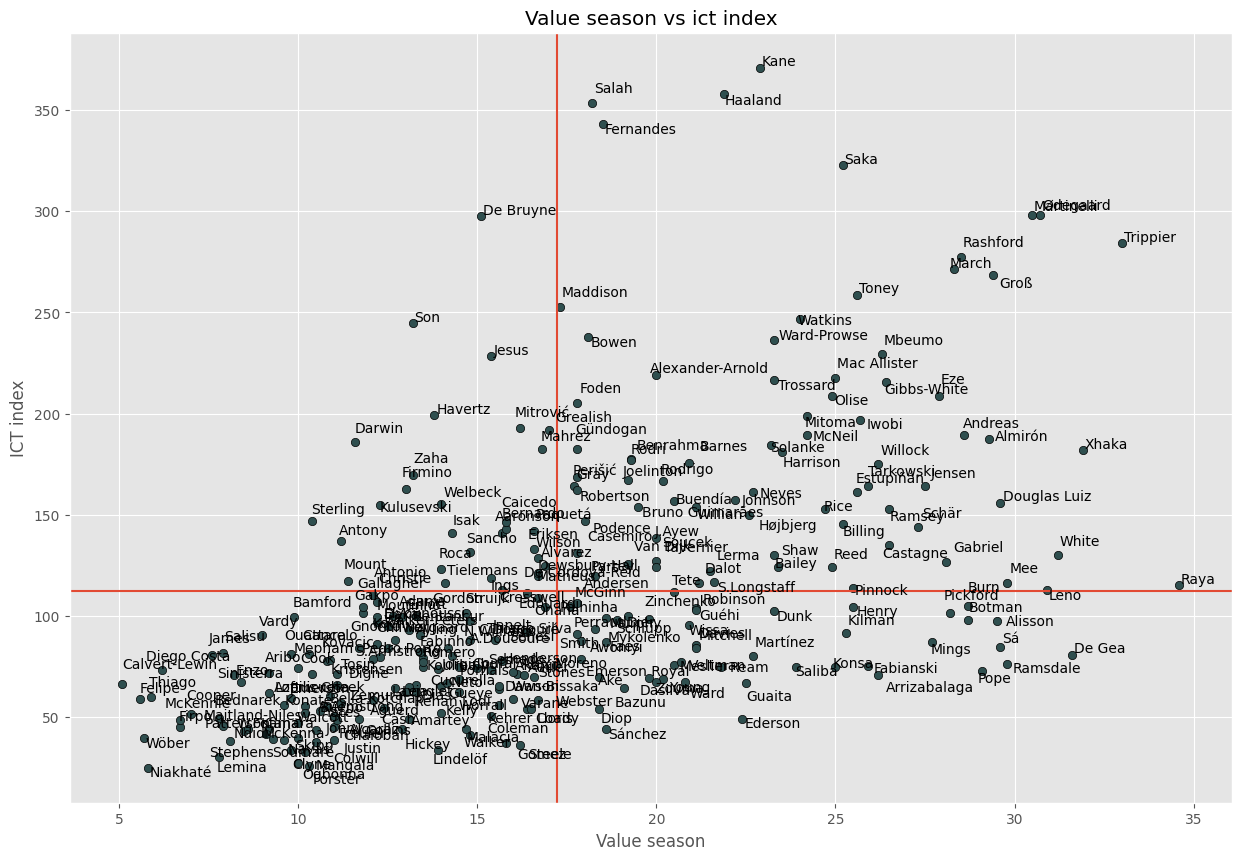

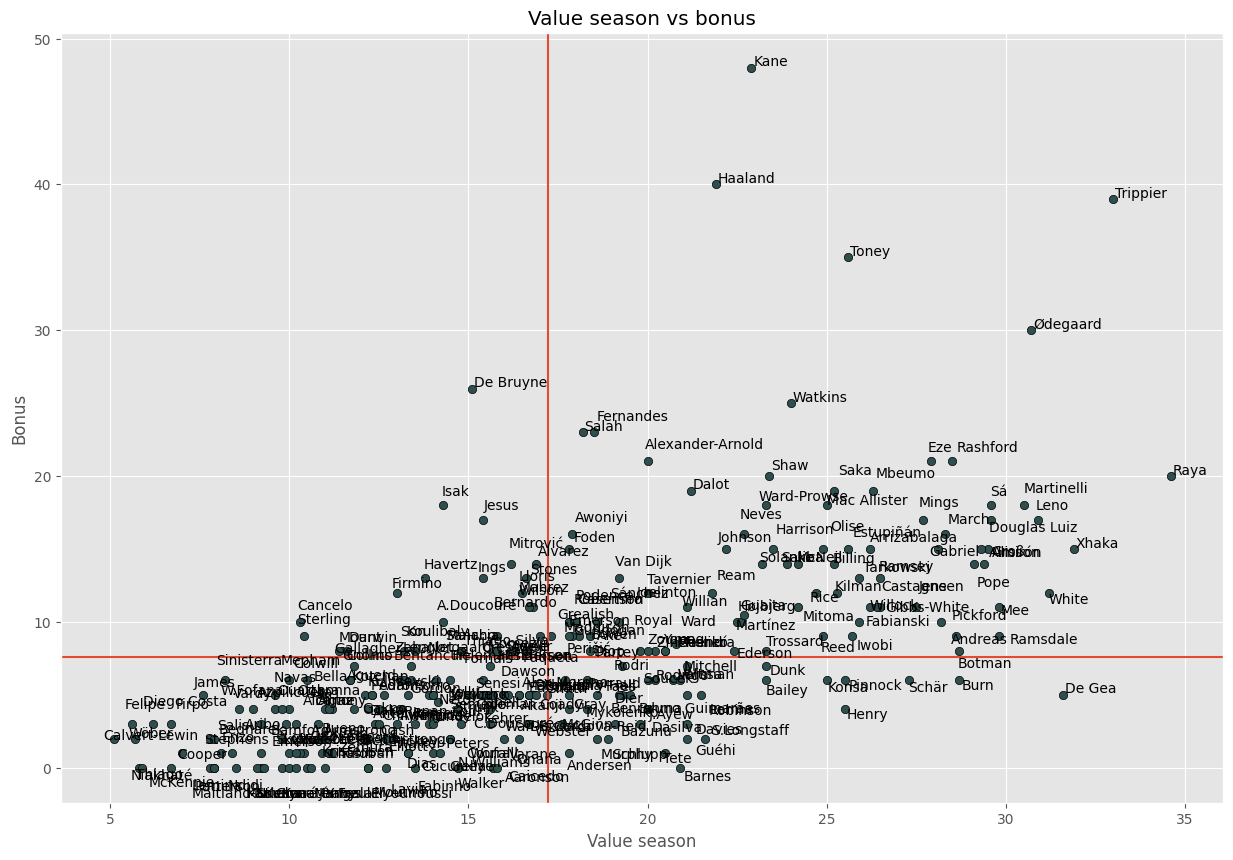

In [18]:
influence_tp_df = df.groupby(['web_name']).aggregate({'influence': 'mean', 'total_points': 'mean'})
influence_tp_df.sort_values(by='total_points', ascending=False)
influence_vs_df = df.groupby(['web_name']).aggregate({'influence': 'mean', 'value_season': 'mean'})
influence_vs_df.sort_values(by='value_season', ascending=False)
creativity_df = df.groupby(['web_name']).aggregate({'creativity': 'mean', 'value_season': 'mean'})
creativity_df.sort_values(by='creativity', ascending=False)
threat_df = df.groupby(['web_name']).aggregate({'threat': 'mean', 'value_season': 'mean'})
threat_df.sort_values(by='threat', ascending=False)
ict_df = df.groupby(['web_name']).aggregate({'ict_index': 'mean', 'value_season': 'mean'})
ict_df.sort_values(by='value_season', ascending=False)
bonus_df = df.groupby(['web_name']).aggregate({'bonus': 'mean', 'value_season': 'mean'})
bonus_df.sort_values(by='value_season', ascending=False)

#Plot 12_1
fg, ax = plt.subplots(figsize=(15,10))
x = influence_tp_df['total_points']
y = influence_tp_df['influence']
ax.scatter(x, y, edgecolor='black', color='#2F4F4F')
ax.set(title='Total points vs influence', xlabel='Total points', ylabel='Influence')
ax.axhline(y.mean())
ax.axvline(x.mean())
#creating matplotlib.text list
texts = [plt.text(x[i], y[i], influence_tp_df.index[i]) for i in range(len(influence_tp_df))]
adjust_text(texts) # use adjust_text from adjust_Text library
plt.show()

#Plot 12_2
fg, ax = plt.subplots(figsize=(15,10))
x = influence_vs_df['value_season']
y = influence_vs_df['influence']
ax.scatter(x, y, edgecolor='black', color='#2F4F4F')
ax.set(title='Value season vs influence', xlabel='Value season', ylabel='Influence')
ax.axhline(y.mean())
ax.axvline(x.mean())
texts = [plt.text(x[i], y[i], influence_vs_df.index[i]) for i in range(len(influence_vs_df))]
adjust_text(texts) # use adjust_text from adjust_Text library
plt.show()

#Plot 12_3
fg, ax = plt.subplots(figsize=(15,10))
x = creativity_df['value_season']
y = creativity_df['creativity']
ax.scatter(x, y, edgecolor='black', color='#2F4F4F')
ax.set(title='Value season vs creativity', xlabel='Value season', ylabel='Creativity')
ax.axhline(y.mean())
ax.axvline(x.mean())
texts = [plt.text(x[i], y[i], creativity_df.index[i]) for i in range(len(creativity_df))]
adjust_text(texts) # use adjust_text from adjust_Text library
plt.show()

#Plot 12_4
fg, ax = plt.subplots(figsize=(15,10))
x = threat_df['value_season']
y = threat_df['threat']
ax.scatter(x, y, edgecolor='black', color='#2F4F4F')
ax.set(title='Value season vs threat', xlabel='Value season', ylabel='Threat')
ax.axhline(y.mean())
ax.axvline(x.mean())
texts = [plt.text(x[i], y[i], threat_df.index[i]) for i in range(len(threat_df))]
adjust_text(texts)
plt.show()

#Plot 12_5
fg, ax = plt.subplots(figsize=(15,10))
x = ict_df['value_season']
y = ict_df['ict_index']
ax.scatter(x, y, edgecolor='black', color='#2F4F4F')
ax.set(title='Value season vs ict index', xlabel='Value season', ylabel='ICT index')
ax.axhline(y.mean())
ax.axvline(x.mean())
texts = [plt.text(x[i], y[i], ict_df.index[i]) for i in range(len(ict_df))]
adjust_text(texts)
plt.show()

#Plot 12_6
fg, ax = plt.subplots(figsize=(15,10))
x = bonus_df['value_season']
y = bonus_df['bonus']
ax.scatter(x, y, edgecolor='black', color='#2F4F4F')
ax.set(title='Value season vs bonus', xlabel='Value season', ylabel='Bonus')
ax.axhline(y.mean())
ax.axvline(x.mean())
texts = [plt.text(x[i], y[i], bonus_df.index[i]) for i in range(len(bonus_df))]
adjust_text(texts)
plt.show()

- **Value season vs influence**: data is structuraze with linear growth dentence. But it's not that accumulated so the potential confidence intervals will be high. We see top scorer like Odegaard, Rashford or Haaland and Kane with lower value season but greater influence than other two. But in the far top right corner there are a couple of goalkeepers: Raya, Leno, Alisson, Pickford.
- **Value season vs creativity**: data on the plot is very compressed on the left bottom side. We see that only a few players have an outstanding creativity score. Trippier is a top scorer in this categories. On the right top there are Gros, Odegaard or De Bruyne and Fernandes with lower value season but greater creativity than other two. And the rest players are rougly mediocare.
- **Value season vs threat**: very similiar to previous plot but more option to choose in top right corner. This is therefore we have more player that scores goals across the league than players that supply assists.
- **Value season vs ict index**: very comperhesive plot. Four goalkeepers which was in far top right corner now are not that high, which is better valuated across all players and positions.
- **Value season vs bonus**: data are the most compressed from all of the plot. We see several players having high bonus points and the rest of the players are mediocore, bonus points are splitted by large number of players. 

## Team selection
Now the last one part of this analysis when we gather all information deducted to select few squads and we will compare with each other. The teams will be build on previous values. In this part we will be selecting squad based of **influence, creativity, threat, ict_index** and **bonus**.

We will not be included goalkeepers as this position is not reliant on creativity, threat and ict_index. Only influence is relevant for goalkeepers so we will skip this position in forming squad. As we have all of the data we will asume that we will be at end of the season because the price of a players is also retrieved from the end of season. So we will set the budget to 96 mln , to have a room for purchasing goalkeepers (9 mln) then total budget will be 105 which with a changing price is reasonable. To make function choose all the 13 players we define a basic/starting money for a player which is 5 mln, function will cover that for a 13 player this amount will be saved. 



In [17]:
cols = ['first_name','second_name','team','position','total_points','price','minutes','ict_index','influence',
        'creativity','threat','bonus']
df_ct = df[cols] #dataframe from players will be chosen

#df_ct['name'] = df_ct['first_name'].str.cat(df['second_name'], sep=' ')  #merging two columns
teams = df_ct['team'].unique() # list of all teams

def choose_team(df_ordered):
    team_limit = dict(zip(teams, [3 for _ in range(20)])) # dictionary for team limit
    pos_limit = {'Goalkeeper': 0, 'Defender': 5, 'Midfielder': 5, 'Forward': 3}  # dictionary for position limit
    cols = ['first_name','second_name','team','position','total_points','price','minutes','ict_index','influence','creativity',
            'threat','bonus']
    
    squad = pd.DataFrame(columns=cols)
    points = 0
    budget = 96
    for id, row in df_ordered.iterrows():
        #checking if price,pos_limit, team_limit and future picking player will fit in budget
        if budget >= row.price and pos_limit[row.position] != 0 and team_limit[row.team] != 0 and \
           ((budget - 5*(sum(pos_limit.values())-1)) - row['price']) >=0 :
            squad = pd.concat([squad, pd.DataFrame([row])])
            budget -= row.price
            pos_limit[row.position] -= 1
            team_limit[row.team] -= 1
            points += row.total_points
    display(squad)
    print("Remaining budget: " + str((round(budget,2))), ', ', 'points:', points)

print('Team chosed by points: ')
choose_team(df_ct.sort_values(by='total_points', ascending=False)) # sorted dataframe by points
print('\n Team chosed by ict_index: ')
choose_team(df_ct.sort_values(by='ict_index', ascending=False)) # sorted dataframe by ict
print('\n Team chosed by influence: ')
choose_team(df_ct.sort_values(by='influence', ascending=False))
print('\n Team chosed by creativity: ')
choose_team(df_ct.sort_values(by='creativity', ascending=False))
print('\n Team chosed by threat: ')
choose_team(df_ct.sort_values(by='threat', ascending=False))
print('\n Team chosed by bonus: ')
choose_team(df_ct.sort_values(by='bonus', ascending=False))

Team chosed by points: 


,first_name,second_name,team,position,total_points,price,minutes,ict_index,influence,creativity,threat,bonus
489,Erling,Haaland,MCI,Forward,272.0,12.4,2767.0,358.1,1390.0,371.0,1825.0,40.0
673,Harry,Kane,TOT,Forward,263.0,11.5,3406.0,371.0,1256.6,744.8,1707.0,48.0
445,Mohamed,Salah,LIV,Midfielder,239.0,13.1,3290.0,353.7,1046.2,869.9,1620.0,23.0
4,Martin,Ødegaard,ARS,Midfielder,212.0,6.9,3132.0,298.3,960.0,1100.4,920.0,30.0
516,Marcus,Rashford,MUN,Midfielder,205.0,7.2,2880.0,277.6,887.8,459.7,1427.0,21.0
10,Bukayo,Saka,ARS,Midfielder,202.0,8.0,3183.0,322.8,972.2,1091.8,1164.0,19.0
15,Gabriel,Martinelli Silva,ARS,Midfielder,198.0,6.5,2789.0,298.1,844.2,838.1,1300.0,18.0
146,Ben,Mee,BRE,Defender,143.0,4.8,3269.0,116.3,761.4,92.0,307.0,11.0
561,Fabian,Schär,NEW,Defender,139.0,5.1,3207.0,144.1,653.4,263.9,521.0,6.0
45,Tyrone,Mings,AVL,Defender,130.0,4.7,3150.0,87.0,657.2,87.7,121.0,17.0


Remaining budget: 1.2 ,  points: 2391.0

 Team chosed by ict_index: 


,first_name,second_name,team,position,total_points,price,minutes,ict_index,influence,creativity,threat,bonus
673,Harry,Kane,TOT,Forward,263.0,11.5,3406.0,371.0,1256.6,744.8,1707.0,48.0
489,Erling,Haaland,MCI,Forward,272.0,12.4,2767.0,358.1,1390.0,371.0,1825.0,40.0
445,Mohamed,Salah,LIV,Midfielder,239.0,13.1,3290.0,353.7,1046.2,869.9,1620.0,23.0
514,Bruno,Borges Fernandes,MUN,Midfielder,176.0,9.5,3317.0,343.1,948.0,1532.3,948.0,23.0
10,Bukayo,Saka,ARS,Midfielder,202.0,8.0,3183.0,322.8,972.2,1091.8,1164.0,19.0
552,Kieran,Trippier,NEW,Defender,198.0,6.0,3342.0,284.3,904.8,1818.5,117.0,39.0
162,Solly,March,BHA,Midfielder,147.0,5.2,2719.0,271.4,791.8,965.8,955.0,16.0
289,Alex,Iwobi,EVE,Midfielder,126.0,4.9,3379.0,196.7,682.4,917.7,366.0,9.0
301,James,Tarkowski,EVE,Defender,106.0,4.1,3420.0,164.2,1019.6,184.7,435.0,13.0
694,Ivan,Perišić,TOT,Defender,94.0,5.3,2099.0,164.2,517.8,732.8,394.0,6.0


Remaining budget: 0.4 ,  points: 2212.0

 Team chosed by influence: 


,first_name,second_name,team,position,total_points,price,minutes,ict_index,influence,creativity,threat,bonus
489,Erling,Haaland,MCI,Forward,272.0,12.4,2767.0,358.1,1390.0,371.0,1825.0,40.0
673,Harry,Kane,TOT,Forward,263.0,11.5,3406.0,371.0,1256.6,744.8,1707.0,48.0
445,Mohamed,Salah,LIV,Midfielder,239.0,13.1,3290.0,353.7,1046.2,869.9,1620.0,23.0
301,James,Tarkowski,EVE,Defender,106.0,4.1,3420.0,164.2,1019.6,184.7,435.0,13.0
10,Bukayo,Saka,ARS,Midfielder,202.0,8.0,3183.0,322.8,972.2,1091.8,1164.0,19.0
4,Martin,Ødegaard,ARS,Midfielder,212.0,6.9,3132.0,298.3,960.0,1100.4,920.0,30.0
514,Bruno,Borges Fernandes,MUN,Midfielder,176.0,9.5,3317.0,343.1,948.0,1532.3,948.0,23.0
160,Pascal,Groß,BHA,Midfielder,159.0,5.4,3240.0,268.6,888.4,1215.4,578.0,14.0
146,Ben,Mee,BRE,Defender,143.0,4.8,3269.0,116.3,761.4,92.0,307.0,11.0
134,Ethan,Pinnock,BRE,Defender,112.0,4.4,2700.0,113.8,751.6,104.9,279.0,6.0


Remaining budget: 0.7 ,  points: 2289.0

 Team chosed by creativity: 


,first_name,second_name,team,position,total_points,price,minutes,ict_index,influence,creativity,threat,bonus
552,Kieran,Trippier,NEW,Defender,198.0,6.0,3342.0,284.3,904.8,1818.5,117.0,39.0
514,Bruno,Borges Fernandes,MUN,Midfielder,176.0,9.5,3317.0,343.1,948.0,1532.3,948.0,23.0
474,Kevin,De Bruyne,MCI,Midfielder,183.0,12.1,2413.0,297.6,897.8,1476.7,598.0,26.0
160,Pascal,Groß,BHA,Midfielder,159.0,5.4,3240.0,268.6,888.4,1215.4,578.0,14.0
447,Trent,Alexander-Arnold,LIV,Defender,156.0,7.8,2922.0,219.0,779.0,1168.2,241.0,21.0
637,James,Ward-Prowse,SOU,Midfielder,142.0,6.1,3371.0,236.3,880.4,1162.9,319.0,18.0
4,Martin,Ødegaard,ARS,Midfielder,212.0,6.9,3132.0,298.3,960.0,1100.4,920.0,30.0
446,Andrew,Robertson,LIV,Defender,121.0,6.8,2579.0,162.3,549.2,862.1,211.0,10.0
137,Bryan,Mbeumo,BRE,Forward,150.0,5.7,2905.0,229.3,662.4,766.3,866.0,19.0
184,Pervis,Estupiñán,BHA,Defender,128.0,5.0,2674.0,161.3,570.2,752.9,295.0,15.0


Remaining budget: 0.5 ,  points: 2084.0

 Team chosed by threat: 


,first_name,second_name,team,position,total_points,price,minutes,ict_index,influence,creativity,threat,bonus
489,Erling,Haaland,MCI,Forward,272.0,12.4,2767.0,358.1,1390.0,371.0,1825.0,40.0
673,Harry,Kane,TOT,Forward,263.0,11.5,3406.0,371.0,1256.6,744.8,1707.0,48.0
445,Mohamed,Salah,LIV,Midfielder,239.0,13.1,3290.0,353.7,1046.2,869.9,1620.0,23.0
516,Marcus,Rashford,MUN,Midfielder,205.0,7.2,2880.0,277.6,887.8,459.7,1427.0,21.0
15,Gabriel,Martinelli Silva,ARS,Midfielder,198.0,6.5,2789.0,298.1,844.2,838.1,1300.0,18.0
23,Gabriel,Fernando de Jesus,ARS,Forward,125.0,8.1,2064.0,228.3,594.2,407.3,1282.0,17.0
162,Solly,March,BHA,Midfielder,147.0,5.2,2719.0,271.4,791.8,965.8,955.0,16.0
4,Martin,Ødegaard,ARS,Midfielder,212.0,6.9,3132.0,298.3,960.0,1100.4,920.0,30.0
301,James,Tarkowski,EVE,Defender,106.0,4.1,3420.0,164.2,1019.6,184.7,435.0,13.0
694,Ivan,Perišić,TOT,Defender,94.0,5.3,2099.0,164.2,517.8,732.8,394.0,6.0


Remaining budget: 2.4 ,  points: 2204.0

 Team chosed by bonus: 


,first_name,second_name,team,position,total_points,price,minutes,ict_index,influence,creativity,threat,bonus
673,Harry,Kane,TOT,Forward,263.0,11.5,3406.0,371.0,1256.6,744.8,1707.0,48.0
489,Erling,Haaland,MCI,Forward,272.0,12.4,2767.0,358.1,1390.0,371.0,1825.0,40.0
552,Kieran,Trippier,NEW,Defender,198.0,6.0,3342.0,284.3,904.8,1818.5,117.0,39.0
122,Ivan,Toney,BRE,Forward,182.0,7.1,2953.0,258.7,926.8,424.3,1240.0,35.0
4,Martin,Ødegaard,ARS,Midfielder,212.0,6.9,3132.0,298.3,960.0,1100.4,920.0,30.0
474,Kevin,De Bruyne,MCI,Midfielder,183.0,12.1,2413.0,297.6,897.8,1476.7,598.0,26.0
514,Bruno,Borges Fernandes,MUN,Midfielder,176.0,9.5,3317.0,343.1,948.0,1532.3,948.0,23.0
513,Luke,Shaw,MUN,Defender,124.0,5.3,2552.0,124.2,572.8,547.7,118.0,20.0
523,Diogo,Dalot Teixeira,MUN,Defender,102.0,4.8,2152.0,116.0,469.4,418.6,272.0,19.0
45,Tyrone,Mings,AVL,Defender,130.0,4.7,3150.0,87.0,657.2,87.7,121.0,17.0


Remaining budget: 0.5 ,  points: 2248.0


1. **Total Points Team**: This team maximizes the total points scored, utilizing high-performing players from various positions. It has the highest total points among all selection criteria and a balanced mix of star forwards, midfielders, and reliable defenders.
2. **ICT Index Team**: This team focuses on the overall influence, creativity, and threat of players. Despite strong individual performances, the total points are lower than the team selected purely by points. High ICT Index doesn't always correlate with the highest FPL points.
3. **Influence Team**: Prioritizing players with high influence results in a high total points score, second only to the total points team. It includes consistent and impactful players, indicating a strong correlation between influence and FPL points.
4. **Creativity Team**: This team scores the lowest in terms of total points. While creativity is valuable, it doesn't translate directly to FPL points as much as other metrics. Players may create opportunities without always earning points for assists or goals.
5. **Threat Team**: This team has a solid total points score, focusing on players who are most likely to score. However, it has a significant remaining budget, suggesting that it might be possible to optimize the team further by investing more of the budget.
6. **Bonus Team**: This team focuses on players who receive bonus points, resulting in a reasonably high total points score. Bonus points can be a reliable indicator of consistent performance.

**Conclusions**:
- **Total Points**: The most effective criterion for maximizing FPL points is selecting based on total points scored.
- **Influence**: A strong secondary criterion, with high influence players often translating to high FPL points.
- **ICT Index** and **Threat**: While these metrics are useful, they don't always result in the highest FPL points when used in isolation.
- **Creativity**: This metric has the least direct correlation with total FPL points, suggesting that creative players should be complemented with those who score and assist more frequently.
- **Bonus Points**: A good indicator of consistent performers but not the highest scoring criterion.
In summary, a balanced approach incorporating total points, influence, and some consideration for bonus points can be most effective in building a high-scoring FPL team.

By following these insights, we aim to build a high-performing Fantasy Premier League team with a well-rounded selection of players.